## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                              mean_squared_error, mean_absolute_error, r2_score, classification_report,
                              roc_auc_score, roc_curve, auc)

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

base_dir = Path.cwd()
print(f"Working directory: {base_dir}")

Working directory: c:\Users\hp\Downloads\NILM_appliance_level_data-20251126T130336Z-1-001\NILM_appliance_level_data


## Load AC_base Data

In [2]:
# Load the combined AC_base data
ac_data = pd.read_csv(base_dir / 'AC_base_combined.csv')
ac_data['timestamp'] = pd.to_datetime(ac_data['timestamp'])

print(f"Dataset shape: {ac_data.shape}")
print(f"Date range: {ac_data['timestamp'].min()} to {ac_data['timestamp'].max()}")
print(f"\nColumns: {ac_data.columns.tolist()}")
print(f"\nFirst few rows:")
ac_data.head(10)

Dataset shape: (165495, 5)
Date range: 2025-10-12 18:21:58 to 2025-10-29 09:31:03

Columns: ['timestamp', 'AC_activepower', 'AC_reactivepower', 'appliance', 'day']

First few rows:


,timestamp,AC_activepower,AC_reactivepower,appliance,day
0,2025-10-12 18:21:58,0,0,AC_base,2025-10-12
1,2025-10-12 18:22:03,0,0,AC_base,2025-10-12
2,2025-10-12 18:22:08,0,0,AC_base,2025-10-12
3,2025-10-12 18:22:14,0,0,AC_base,2025-10-12
4,2025-10-12 18:22:35,0,0,AC_base,2025-10-12
5,2025-10-12 18:22:41,0,0,AC_base,2025-10-12
6,2025-10-12 18:22:54,0,0,AC_base,2025-10-12
7,2025-10-12 18:23:03,0,-37,AC_base,2025-10-12
8,2025-10-12 18:23:08,14,-36,AC_base,2025-10-12
9,2025-10-12 18:23:16,15,-36,AC_base,2025-10-12


In [3]:
# Check for missing values
print("Missing values:")
print(ac_data.isnull().sum())
print(f"\nData types:")
print(ac_data.dtypes)
print(f"\nBasic statistics:")
ac_data[['AC_activepower', 'AC_reactivepower']].describe()

Missing values:
timestamp           0
AC_activepower      0
AC_reactivepower    0
appliance           0
day                 0
dtype: int64

Data types:
timestamp           datetime64[ns]
AC_activepower               int64
AC_reactivepower             int64
appliance                   object
day                         object
dtype: object

Basic statistics:


,AC_activepower,AC_reactivepower
count,165495.000000,165495.000000
mean,263.750047,-11.055899
std,364.955204,14.360502
min,0.000000,-66.000000
25%,0.000000,-17.000000
50%,0.000000,0.000000
75%,496.000000,0.000000
max,1806.000000,18.000000


## Exploratory Data Analysis (EDA)

### 1. Distribution of Active Power

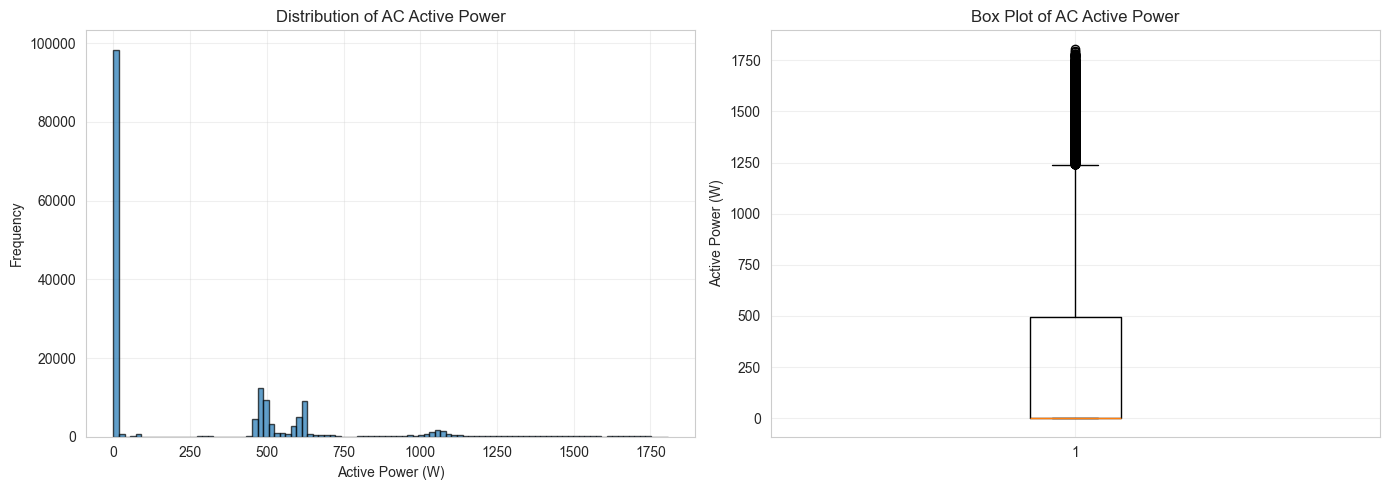

Active Power Statistics:
  Min: 0 W
  Max: 1806 W
  Mean: 263.75 W
  Median: 0.00 W
  Std Dev: 364.96 W


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(ac_data['AC_activepower'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Active Power (W)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of AC Active Power')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(ac_data['AC_activepower'], vert=True)
axes[1].set_ylabel('Active Power (W)')
axes[1].set_title('Box Plot of AC Active Power')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Active Power Statistics:")
print(f"  Min: {ac_data['AC_activepower'].min()} W")
print(f"  Max: {ac_data['AC_activepower'].max()} W")
print(f"  Mean: {ac_data['AC_activepower'].mean():.2f} W")
print(f"  Median: {ac_data['AC_activepower'].median():.2f} W")
print(f"  Std Dev: {ac_data['AC_activepower'].std():.2f} W")

### 2. Distribution of Reactive Power

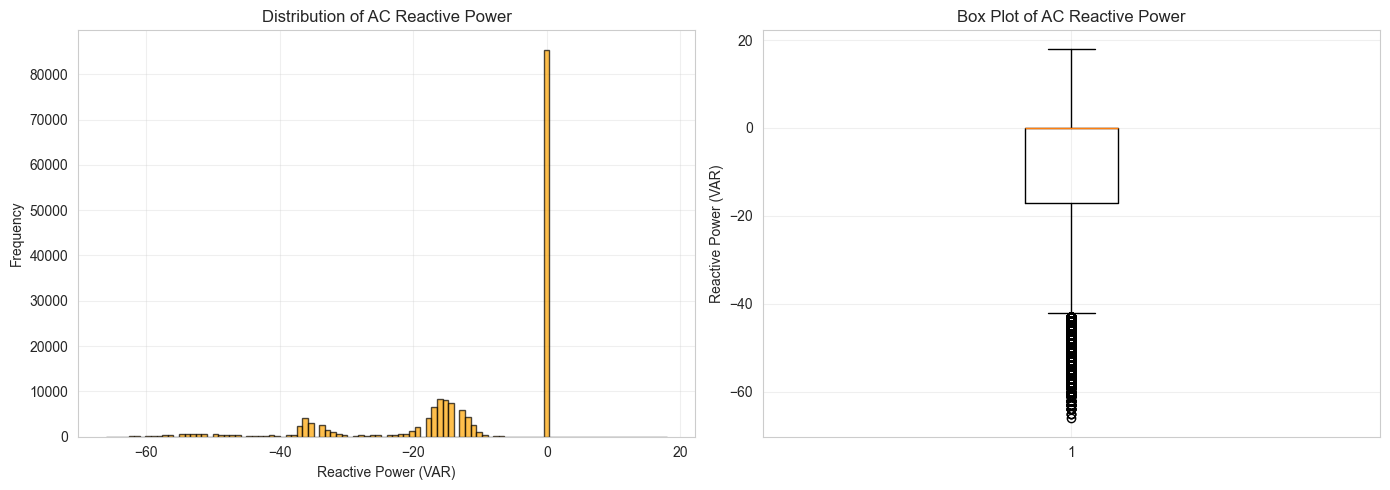

Reactive Power Statistics:
  Min: -66 VAR
  Max: 18 VAR
  Mean: -11.06 VAR
  Median: 0.00 VAR
  Std Dev: 14.36 VAR


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(ac_data['AC_reactivepower'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0].set_xlabel('Reactive Power (VAR)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of AC Reactive Power')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(ac_data['AC_reactivepower'], vert=True)
axes[1].set_ylabel('Reactive Power (VAR)')
axes[1].set_title('Box Plot of AC Reactive Power')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Reactive Power Statistics:")
print(f"  Min: {ac_data['AC_reactivepower'].min()} VAR")
print(f"  Max: {ac_data['AC_reactivepower'].max()} VAR")
print(f"  Mean: {ac_data['AC_reactivepower'].mean():.2f} VAR")
print(f"  Median: {ac_data['AC_reactivepower'].median():.2f} VAR")
print(f"  Std Dev: {ac_data['AC_reactivepower'].std():.2f} VAR")

### 3. Active Power vs Reactive Power Correlation

Correlation Matrix:
                  AC_activepower  AC_reactivepower
AC_activepower          1.000000         -0.652092
AC_reactivepower       -0.652092          1.000000


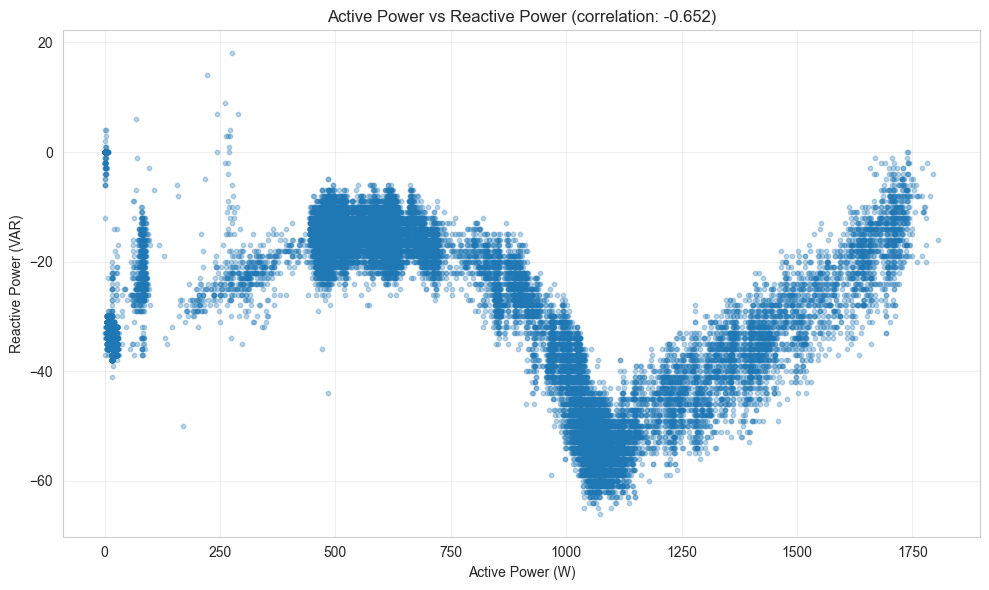

In [6]:
# Correlation matrix
corr_matrix = ac_data[['AC_activepower', 'AC_reactivepower']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ac_data['AC_activepower'], ac_data['AC_reactivepower'], alpha=0.3, s=10)
plt.xlabel('Active Power (W)')
plt.ylabel('Reactive Power (VAR)')
plt.title(f'Active Power vs Reactive Power (correlation: {corr_matrix.loc["AC_activepower", "AC_reactivepower"]:.3f})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Time Series Patterns

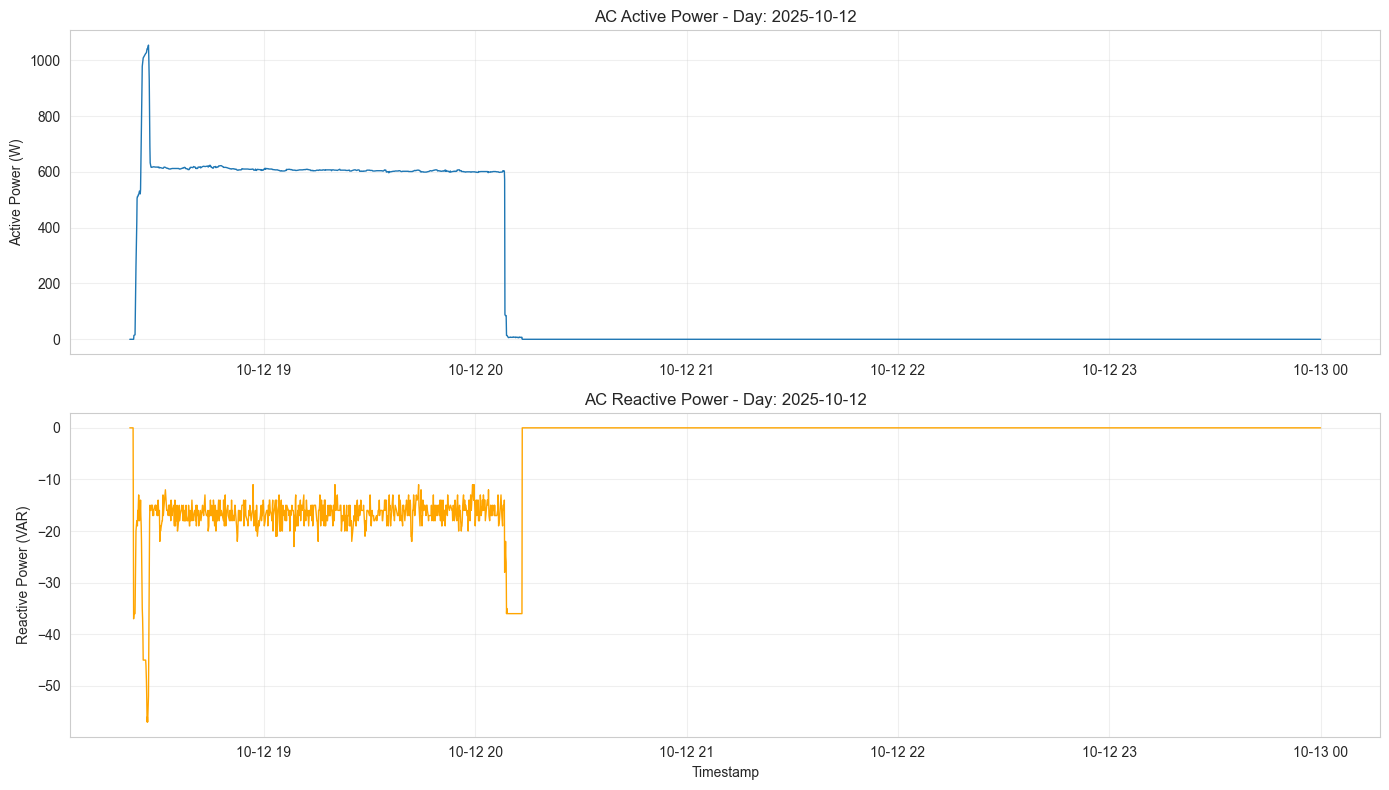

First day data points: 2523


In [6]:
# Plot time series for first day
first_day = ac_data[ac_data['day'] == ac_data['day'].iloc[0]].copy()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(first_day['timestamp'], first_day['AC_activepower'], linewidth=1)
axes[0].set_ylabel('Active Power (W)')
axes[0].set_title(f'AC Active Power - Day: {first_day["day"].iloc[0]}')
axes[0].grid(True, alpha=0.3)

axes[1].plot(first_day['timestamp'], first_day['AC_reactivepower'], linewidth=1, color='orange')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Reactive Power (VAR)')
axes[1].set_title(f'AC Reactive Power - Day: {first_day["day"].iloc[0]}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"First day data points: {len(first_day)}")

### 5. AC On/Off Status Analysis

In [7]:
# Define AC on/off threshold
# We'll use a threshold based on the data distribution
# AC is ON if active power > threshold (e.g., 10W to filter out noise)
threshold = ac_data['AC_activepower'].quantile(0.1)  # 10th percentile as threshold
print(f"Threshold for AC ON/OFF: {threshold} W (10th percentile)")
print(f"\nTesting different thresholds:")
for q in [0.05, 0.1, 0.15, 0.2]:
    t = ac_data['AC_activepower'].quantile(q)
    on_count = (ac_data['AC_activepower'] > t).sum()
    on_pct = (on_count / len(ac_data)) * 100
    print(f"  Threshold {t:.1f}W ({q*100:.0f}th percentile): {on_count} ON ({on_pct:.1f}%)")

# Use a reasonable threshold (e.g., 50W)
threshold = 50
ac_data['AC_status'] = (ac_data['AC_activepower'] > threshold).astype(int)

on_count = (ac_data['AC_status'] == 1).sum()
off_count = (ac_data['AC_status'] == 0).sum()
print(f"\nUsing threshold: {threshold} W")
print(f"AC OFF: {off_count} ({off_count/len(ac_data)*100:.1f}%)")
print(f"AC ON: {on_count} ({on_count/len(ac_data)*100:.1f}%)")

Threshold for AC ON/OFF: 0.0 W (10th percentile)

Testing different thresholds:
  Threshold 0.0W (5th percentile): 80072 ON (48.4%)
  Threshold 0.0W (10th percentile): 80072 ON (48.4%)
  Threshold 0.0W (15th percentile): 80072 ON (48.4%)
  Threshold 0.0W (20th percentile): 80072 ON (48.4%)

Using threshold: 50 W
AC OFF: 98988 (59.8%)
AC ON: 66507 (40.2%)


### 6. Extract Time Features from Timestamp

KeyError: 'seconds_since_midnight'

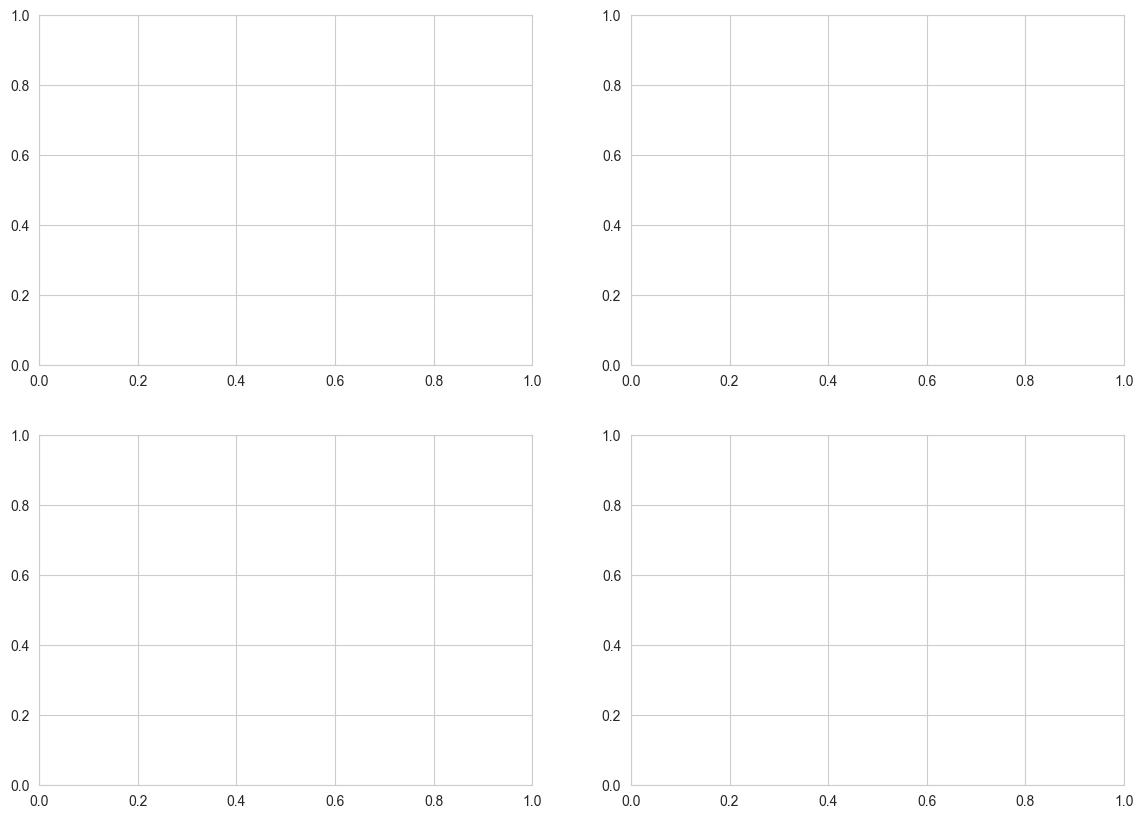

In [8]:
# Extract hour from timestamp for visualization
ac_data_temp = ac_data.copy()
ac_data_temp['hour'] = ac_data_temp['timestamp'].dt.hour

# Visualize time feature distribution and its relationship with AC status
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of seconds_since_midnight
axes[0, 0].hist(ac_data_temp['seconds_since_midnight'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Seconds Since Midnight')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Time Feature (Seconds Since Midnight)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Average active power by time of day (hourly)
hourly_avg = ac_data_temp.groupby('hour')['AC_activepower'].mean()
axes[0, 1].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, color='green')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Avg Active Power (W)')
axes[0, 1].set_title('Average AC Power by Hour')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# 3. AC status distribution by hour
status_by_hour = ac_data_temp.groupby('hour')['AC_status'].apply(lambda x: (x == 1).sum() / len(x) * 100)
axes[1, 0].bar(status_by_hour.index, status_by_hour.values, color='coral')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('% AC ON')
axes[1, 0].set_title('AC ON Percentage by Hour')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_xticks(range(0, 24, 2))

# 4. Time feature vs Active Power (scatter with AC status color coding)
on_data = ac_data_temp[ac_data_temp['AC_status'] == 1]
off_data = ac_data_temp[ac_data_temp['AC_status'] == 0]
axes[1, 1].scatter(off_data['seconds_since_midnight'], off_data['AC_activepower'], 
                   alpha=0.2, s=5, label='AC OFF', color='blue')
axes[1, 1].scatter(on_data['seconds_since_midnight'], on_data['AC_activepower'], 
                   alpha=0.2, s=5, label='AC ON', color='red')
axes[1, 1].set_xlabel('Seconds Since Midnight')
axes[1, 1].set_ylabel('Active Power (W)')
axes[1, 1].set_title('Active Power vs Time of Day (colored by AC status)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTime Feature Insights:")
print(f"  Hour with highest avg power: {hourly_avg.idxmax()}:00 ({hourly_avg.max():.0f}W)")
print(f"  Hour with lowest avg power: {hourly_avg.idxmin()}:00 ({hourly_avg.min():.0f}W)")
print(f"  Hour with highest % AC ON: {status_by_hour.idxmax()}:00 ({status_by_hour.max():.1f}%)")
print(f"  Hour with lowest % AC ON: {status_by_hour.idxmin()}:00 ({status_by_hour.min():.1f}%)")

In [9]:
# Extract time components from timestamp
ac_data['time_only'] = ac_data['timestamp'].dt.time
ac_data['seconds_since_midnight'] = (ac_data['timestamp'].dt.hour * 3600 + 
                                      ac_data['timestamp'].dt.minute * 60 + 
                                      ac_data['timestamp'].dt.second)

print("Time extraction from timestamp:")
print(f"\nFirst 10 rows with time features:")
print(ac_data[['timestamp', 'time_only', 'seconds_since_midnight']].head(10))

print(f"\n\nTime statistics:")
print(f"  Min seconds since midnight: {ac_data['seconds_since_midnight'].min()} (midnight)")
print(f"  Max seconds since midnight: {ac_data['seconds_since_midnight'].max()} (almost midnight)")
print(f"  Average seconds since midnight: {ac_data['seconds_since_midnight'].mean():.0f}")

Time extraction from timestamp:

First 10 rows with time features:
            timestamp time_only  seconds_since_midnight
0 2025-10-12 18:21:58  18:21:58                   66118
1 2025-10-12 18:22:03  18:22:03                   66123
2 2025-10-12 18:22:08  18:22:08                   66128
3 2025-10-12 18:22:14  18:22:14                   66134
4 2025-10-12 18:22:35  18:22:35                   66155
5 2025-10-12 18:22:41  18:22:41                   66161
6 2025-10-12 18:22:54  18:22:54                   66174
7 2025-10-12 18:23:03  18:23:03                   66183
8 2025-10-12 18:23:08  18:23:08                   66188
9 2025-10-12 18:23:16  18:23:16                   66196


Time statistics:
  Min seconds since midnight: 0 (midnight)
  Max seconds since midnight: 86399 (almost midnight)
  Average seconds since midnight: 43512


In [10]:
# Create additional features
ac_data_features = ac_data.copy()

# 1. Apparent Power (S = sqrt(P^2 + Q^2))
ac_data_features['apparent_power'] = np.sqrt(
    ac_data_features['AC_activepower']**2 + ac_data_features['AC_reactivepower']**2
)

# 2. Power Factor (PF = P / S)
ac_data_features['power_factor'] = ac_data_features['AC_activepower'] / (ac_data_features['apparent_power'] + 1e-6)

# 3. Reactive to Active Power Ratio
ac_data_features['reactive_to_active_ratio'] = ac_data_features['AC_reactivepower'] / (ac_data_features['AC_activepower'] + 1)

# 4. Lagged features (previous values)
ac_data_features['activepower_lag1'] = ac_data_features['AC_activepower'].shift(1)
ac_data_features['activepower_lag2'] = ac_data_features['AC_activepower'].shift(2)
ac_data_features['reactivepower_lag1'] = ac_data_features['AC_reactivepower'].shift(1)

# 5. Rolling mean (smoothing)
ac_data_features['activepower_rolling_mean_5'] = ac_data_features['AC_activepower'].rolling(5, min_periods=1).mean()
ac_data_features['reactivepower_rolling_mean_5'] = ac_data_features['AC_reactivepower'].rolling(5, min_periods=1).mean()

# 6. Time-based features
ac_data_features['hour'] = ac_data_features['timestamp'].dt.hour
ac_data_features['day_of_week'] = ac_data_features['timestamp'].dt.dayofweek
ac_data_features['minute'] = ac_data_features['timestamp'].dt.minute
ac_data_features['second'] = ac_data_features['timestamp'].dt.second

# 7. Seconds since midnight (combines hour, minute, second into single time feature)
ac_data_features['seconds_since_midnight'] = (ac_data_features['hour'] * 3600 + 
                                               ac_data_features['minute'] * 60 + 
                                               ac_data_features['second'])

# Drop NaN values created by lagging
ac_data_features = ac_data_features.dropna().reset_index(drop=True)

print(f"Features created. Dataset shape: {ac_data_features.shape}")
print(f"\nNew columns: {ac_data_features.columns.tolist()}")
print(f"\nFeature statistics:")
print(ac_data_features[['apparent_power', 'power_factor', 'reactive_to_active_ratio', 'seconds_since_midnight']].describe())

Features created. Dataset shape: (165493, 20)

New columns: ['timestamp', 'AC_activepower', 'AC_reactivepower', 'appliance', 'day', 'AC_status', 'time_only', 'seconds_since_midnight', 'apparent_power', 'power_factor', 'reactive_to_active_ratio', 'activepower_lag1', 'activepower_lag2', 'reactivepower_lag1', 'activepower_rolling_mean_5', 'reactivepower_rolling_mean_5', 'hour', 'day_of_week', 'minute', 'second']

Feature statistics:
       apparent_power   power_factor  reactive_to_active_ratio  \
count   165493.000000  165493.000000             165493.000000   
mean       265.784855       0.434202                 -0.202305   
std        363.930907       0.475684                  0.686579   
min          0.000000       0.000000                -37.000000   
25%          0.000000       0.000000                 -0.030801   
50%          0.000000       0.000000                  0.000000   
75%        496.226763       0.999494                  0.000000   
max       1806.070873       1.000000  

### 7. Power by AC Status

In [11]:
# Prepare data for classification
# Features: AC_activepower, AC_reactivepower, hour, day_of_week, apparent_power, power_factor, reactive_to_active_ratio
classification_features = [
    'AC_activepower', 'AC_reactivepower', 'hour', 'day_of_week', 'minute', 'second',
    'apparent_power', 'power_factor', 'reactive_to_active_ratio',
    'activepower_lag1', 'activepower_lag2', 'reactivepower_lag1',
    'activepower_rolling_mean_5', 'reactivepower_rolling_mean_5', 'seconds_since_midnight'
]

X_clf = ac_data_features[classification_features].copy()
y_clf = ac_data_features['AC_status'].copy()

print(f"Classification dataset:")
print(f"  Features shape: {X_clf.shape}")
print(f"  Target shape: {y_clf.shape}")
print(f"  Features include: {classification_features}")
print(f"  Class distribution:")
print(f"    OFF: {(y_clf == 0).sum()} ({(y_clf == 0).sum()/len(y_clf)*100:.1f}%)")
print(f"    ON: {(y_clf == 1).sum()} ({(y_clf == 1).sum()/len(y_clf)*100:.1f}%)")

Classification dataset:
  Features shape: (165493, 15)
  Target shape: (165493,)
  Features include: ['AC_activepower', 'AC_reactivepower', 'hour', 'day_of_week', 'minute', 'second', 'apparent_power', 'power_factor', 'reactive_to_active_ratio', 'activepower_lag1', 'activepower_lag2', 'reactivepower_lag1', 'activepower_rolling_mean_5', 'reactivepower_rolling_mean_5', 'seconds_since_midnight']
  Class distribution:
    OFF: 98986 (59.8%)
    ON: 66507 (40.2%)


## Model Training & Evaluation

### 1. Train-Test Split for Classification (AC On/Off)

In [12]:
# Split data for classification (AC On/Off)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("="*70)
print("CLASSIFICATION: TRAIN-TEST SPLIT")
print("="*70)
print(f"Total samples: {len(X_clf):,}")
print(f"Training set: {len(X_train_clf):,} ({len(X_train_clf)/len(X_clf)*100:.1f}%)")
print(f"Test set: {len(X_test_clf):,} ({len(X_test_clf)/len(X_clf)*100:.1f}%)")
print(f"\nClass distribution (Training):")
print(f"  OFF: {(y_train_clf == 0).sum():,} ({(y_train_clf == 0).sum()/len(y_train_clf)*100:.1f}%)")
print(f"  ON:  {(y_train_clf == 1).sum():,} ({(y_train_clf == 1).sum()/len(y_train_clf)*100:.1f}%)")
print(f"\nClass distribution (Test):")
print(f"  OFF: {(y_test_clf == 0).sum():,} ({(y_test_clf == 0).sum()/len(y_test_clf)*100:.1f}%)")
print(f"  ON:  {(y_test_clf == 1).sum():,} ({(y_test_clf == 1).sum()/len(y_test_clf)*100:.1f}%)")
print(f"\nFeatures: {X_train_clf_scaled.shape[1]}")
print(f"Scaler: StandardScaler")

# Store scaler for later use in predictions
print("\n✓ Scaler saved for use in predictions")

CLASSIFICATION: TRAIN-TEST SPLIT
Total samples: 165,493
Training set: 132,394 (80.0%)
Test set: 33,099 (20.0%)

Class distribution (Training):
  OFF: 79,189 (59.8%)
  ON:  53,205 (40.2%)

Class distribution (Test):
  OFF: 19,797 (59.8%)
  ON:  13,302 (40.2%)

Features: 15
Scaler: StandardScaler

✓ Scaler saved for use in predictions


### 2. Classification Models (AC On/Off)

In [13]:
# Train multiple classification models
print("\n" + "="*70)
print("TRAINING CLASSIFICATION MODELS")
print("="*70)

classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
}

clf_results = {}

for name, model in classification_models.items():
    print(f"\n{'-'*70}")
    print(f"Training: {name}")
    print(f"{'-'*70}")
    
    # Train based on model type
    if name == 'Logistic Regression':
        model.fit(X_train_clf_scaled, y_train_clf)
        y_pred = model.predict(X_test_clf_scaled)
        y_pred_proba = model.predict_proba(X_test_clf_scaled)[:, 1]
    else:
        model.fit(X_train_clf, y_train_clf)
        y_pred = model.predict(X_test_clf)
        y_pred_proba = model.predict_proba(X_test_clf)[:, 1]
    
    # Evaluate
    accuracy = accuracy_score(y_test_clf, y_pred)
    precision = precision_score(y_test_clf, y_pred)
    recall = recall_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    roc_auc = roc_auc_score(y_test_clf, y_pred_proba)
    
    clf_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"✓ Accuracy:  {accuracy:.4f}")
    print(f"✓ Precision: {precision:.4f}")
    print(f"✓ Recall:    {recall:.4f}")
    print(f"✓ F1-Score:  {f1:.4f}")
    print(f"✓ ROC-AUC:   {roc_auc:.4f}")

print(f"\n{'='*70}")


TRAINING CLASSIFICATION MODELS

----------------------------------------------------------------------
Training: Logistic Regression
----------------------------------------------------------------------
✓ Accuracy:  0.9999
✓ Precision: 0.9997
✓ Recall:    1.0000
✓ F1-Score:  0.9998
✓ ROC-AUC:   1.0000

----------------------------------------------------------------------
Training: Decision Tree
----------------------------------------------------------------------
✓ Accuracy:  1.0000
✓ Precision: 1.0000
✓ Recall:    1.0000
✓ F1-Score:  1.0000
✓ ROC-AUC:   1.0000

----------------------------------------------------------------------
Training: Random Forest
----------------------------------------------------------------------
✓ Accuracy:  1.0000
✓ Precision: 1.0000
✓ Recall:    1.0000
✓ F1-Score:  1.0000
✓ ROC-AUC:   1.0000

----------------------------------------------------------------------
Training: Random Forest
-----------------------------------------------------------------

In [14]:
# Classification Results Summary
print("\n" + "="*70)
print("CLASSIFICATION MODELS COMPARISON")
print("="*70)

clf_summary = pd.DataFrame({
    'Model': list(clf_results.keys()),
    'Accuracy': [v['accuracy'] for v in clf_results.values()],
    'Precision': [v['precision'] for v in clf_results.values()],
    'Recall': [v['recall'] for v in clf_results.values()],
    'F1-Score': [v['f1'] for v in clf_results.values()],
    'ROC-AUC': [v['roc_auc'] for v in clf_results.values()],
})

clf_summary = clf_summary.sort_values('F1-Score', ascending=False).reset_index(drop=True)
print(clf_summary.to_string(index=False))
print("="*70)

# Best model
best_clf_model = clf_summary.iloc[0]
print(f"\n✓ Best Classification Model: {best_clf_model['Model']}")
print(f"  - Accuracy: {best_clf_model['Accuracy']:.4f}")
print(f"  - F1-Score: {best_clf_model['F1-Score']:.4f}")


CLASSIFICATION MODELS COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
      Decision Tree  1.000000   1.000000     1.0   1.00000      1.0
      Random Forest  1.000000   1.000000     1.0   1.00000      1.0
  Gradient Boosting  1.000000   1.000000     1.0   1.00000      1.0
Logistic Regression  0.999879   0.999699     1.0   0.99985      1.0

✓ Best Classification Model: Decision Tree
  - Accuracy: 1.0000
  - F1-Score: 1.0000


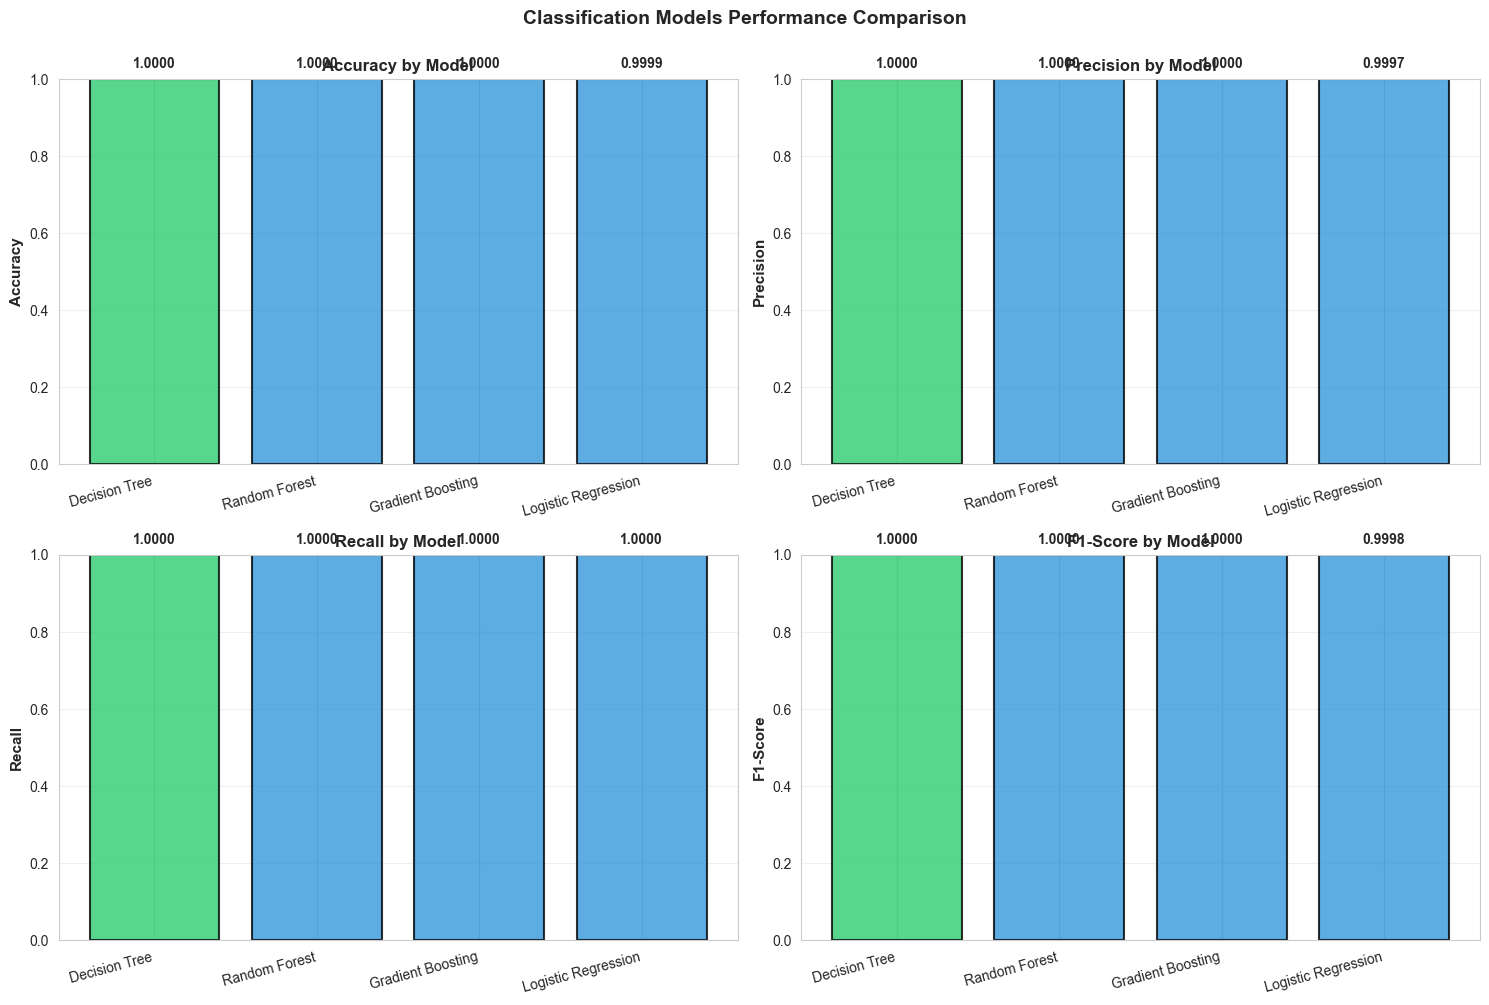

In [15]:
# Visualization of Classification Models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = clf_summary[metric].values
    models = clf_summary['Model'].values
    
    colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(models))]
    bars = ax.bar(models, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} by Model', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.suptitle('Classification Models Performance Comparison', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

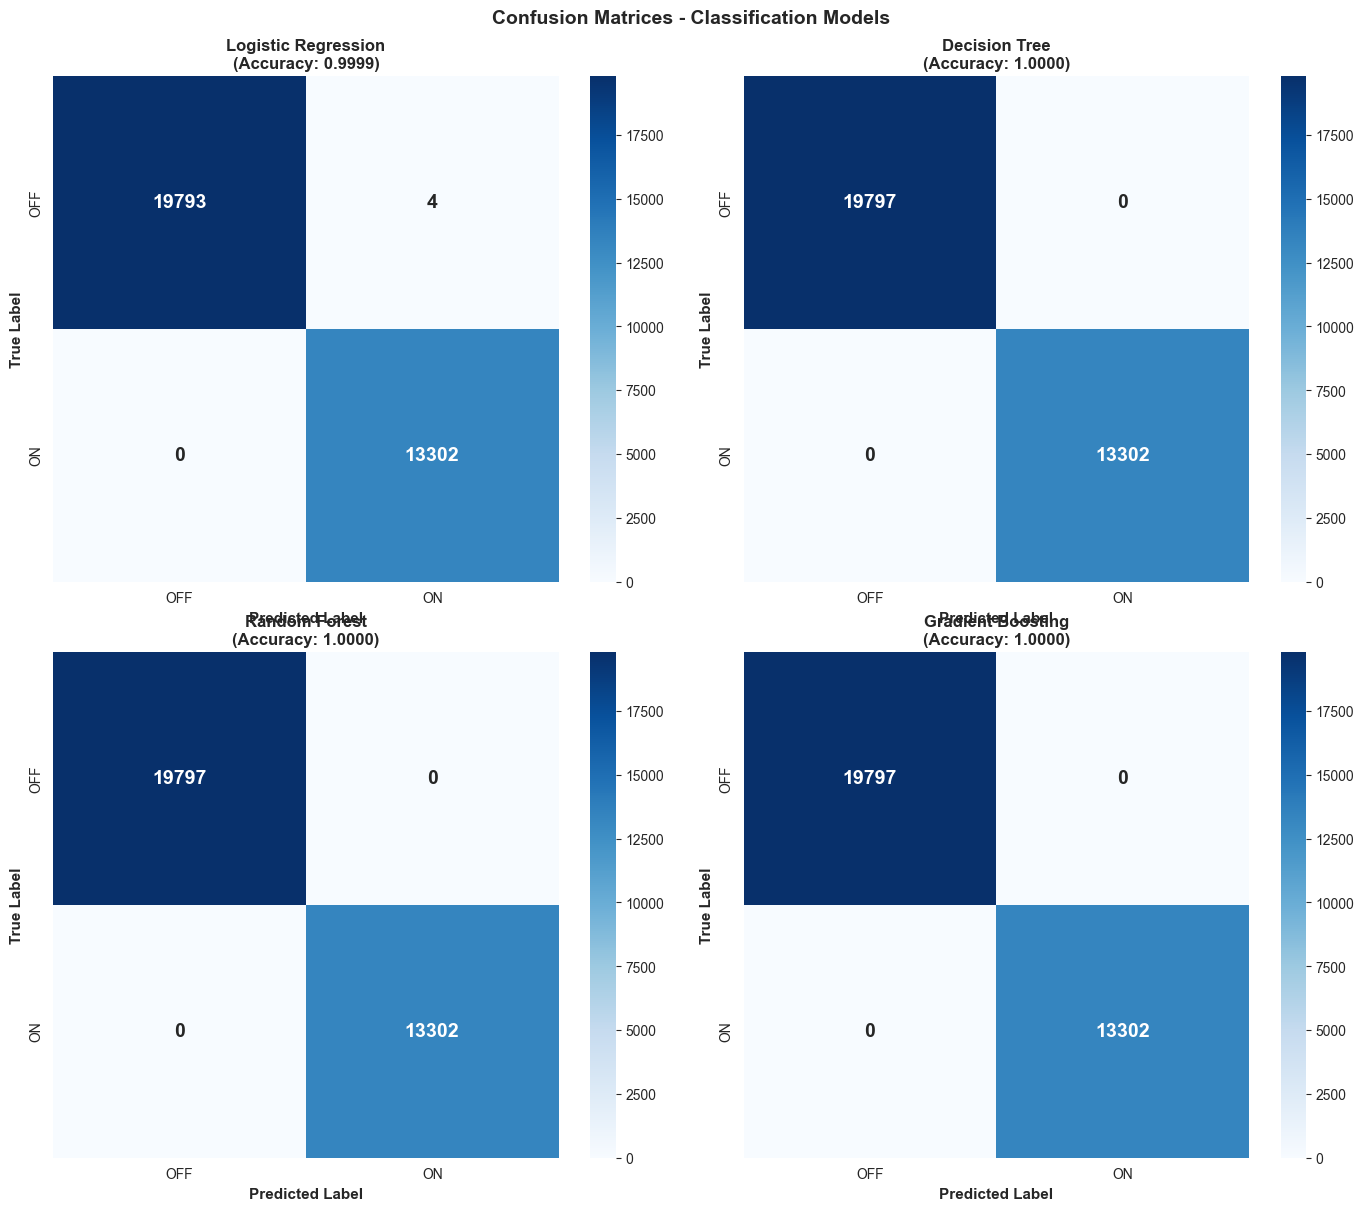


Confusion Matrix Interpretation:
- True Negatives (TN): Correctly predicted OFF
- False Positives (FP): Predicted ON but was OFF
- False Negatives (FN): Predicted OFF but was ON
- True Positives (TP): Correctly predicted ON


In [16]:
# Confusion Matrices for Classification Models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, (name, results) in enumerate(clf_results.items()):
    ax = axes[idx // 2, idx % 2]
    cm = confusion_matrix(y_test_clf, results['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True, 
                square=True, annot_kws={'size': 14, 'weight': 'bold'})
    
    ax.set_title(f'{name}\n(Accuracy: {results["accuracy"]:.4f})', 
                fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    ax.set_xticklabels(['OFF', 'ON'])
    ax.set_yticklabels(['OFF', 'ON'])

plt.suptitle('Confusion Matrices - Classification Models', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("- True Negatives (TN): Correctly predicted OFF")
print("- False Positives (FP): Predicted ON but was OFF")
print("- False Negatives (FN): Predicted OFF but was ON")
print("- True Positives (TP): Correctly predicted ON")

### 3. Train-Test Split for Regression (Power Prediction)

In [17]:
# Prepare data for regression (AC Power Prediction when AC is ON)
ac_on_data = ac_data_features[ac_data_features['AC_status'] == 1].copy()

print("\n" + "="*70)
print("REGRESSION: DATA PREPARATION (AC Power Prediction - When AC is ON)")
print("="*70)
print(f"AC ON data samples: {len(ac_on_data):,}")
print(f"\nActive Power Statistics (AC ON):")
print(ac_on_data['AC_activepower'].describe())

# Define regression features
regression_features = [
    'AC_reactivepower', 'hour', 'day_of_week', 'minute', 'second',
    'apparent_power', 'power_factor', 'reactive_to_active_ratio',
    'activepower_lag1', 'activepower_lag2', 'reactivepower_lag1',
    'activepower_rolling_mean_5', 'reactivepower_rolling_mean_5', 'seconds_since_midnight'
]

X_reg = ac_on_data[regression_features].copy()
y_reg = ac_on_data['AC_activepower'].copy()

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"\n{'='*70}")
print("REGRESSION: TRAIN-TEST SPLIT")
print(f"{'='*70}")
print(f"Total samples: {len(X_reg):,}")
print(f"Training set: {len(X_train_reg):,} ({len(X_train_reg)/len(X_reg)*100:.1f}%)")
print(f"Test set: {len(X_test_reg):,} ({len(X_test_reg)/len(X_reg)*100:.1f}%)")
print(f"\nTarget (Power) Statistics (Training):")
print(f"  Min: {y_train_reg.min():.0f} W")
print(f"  Max: {y_train_reg.max():.0f} W")
print(f"  Mean: {y_train_reg.mean():.2f} W")
print(f"  Std: {y_train_reg.std():.2f} W")
print(f"\nFeatures: {X_train_reg_scaled.shape[1]}")
print(f"Scaler: StandardScaler")

# Store scaler for later use in predictions
print("\n✓ Scaler saved for use in predictions")


REGRESSION: DATA PREPARATION (AC Power Prediction - When AC is ON)
AC ON data samples: 66,507

Active Power Statistics (AC ON):
count    66507.000000
mean       653.184567
std        278.987446
min         54.000000
25%        485.000000
50%        572.000000
75%        630.000000
max       1806.000000
Name: AC_activepower, dtype: float64

REGRESSION: TRAIN-TEST SPLIT
Total samples: 66,507
Training set: 53,205 (80.0%)
Test set: 13,302 (20.0%)

Target (Power) Statistics (Training):
  Min: 54 W
  Max: 1806 W
  Mean: 652.98 W
  Std: 279.13 W

Features: 14
Scaler: StandardScaler

✓ Scaler saved for use in predictions


### 4. Regression Models (Power Prediction)

In [18]:
# Train multiple regression models
print("\n" + "="*70)
print("TRAINING REGRESSION MODELS")
print("="*70)

regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression (α=1.0)': Ridge(alpha=1.0),
    'Ridge Regression (α=10.0)': Ridge(alpha=10.0),
    'Lasso Regression (α=0.1)': Lasso(alpha=0.1),
    'Lasso Regression (α=1.0)': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
}

reg_results = {}

for name, model in regression_models.items():
    print(f"\n{'-'*70}")
    print(f"Training: {name}")
    print(f"{'-'*70}")
    
    # Train based on model type
    if name in ['Linear Regression', 'Ridge Regression (α=1.0)', 'Ridge Regression (α=10.0)', 
                'Lasso Regression (α=0.1)', 'Lasso Regression (α=1.0)']:
        model.fit(X_train_reg_scaled, y_train_reg)
        y_pred = model.predict(X_test_reg_scaled)
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
    
    # Evaluate
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test_reg - y_pred) / (y_test_reg + 1))) * 100
    
    reg_results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape,
        'y_pred': y_pred
    }
    
    print(f"✓ MSE:   {mse:.2f}")
    print(f"✓ RMSE:  {rmse:.2f} W")
    print(f"✓ MAE:   {mae:.2f} W")
    print(f"✓ R²:    {r2:.4f}")
    print(f"✓ MAPE:  {mape:.2f}%")

print(f"\n{'='*70}")


TRAINING REGRESSION MODELS

----------------------------------------------------------------------
Training: Linear Regression
----------------------------------------------------------------------
✓ MSE:   0.00
✓ RMSE:  0.06 W
✓ MAE:   0.03 W
✓ R²:    1.0000
✓ MAPE:  0.01%

----------------------------------------------------------------------
Training: Ridge Regression (α=1.0)
----------------------------------------------------------------------
✓ MSE:   0.01
✓ RMSE:  0.07 W
✓ MAE:   0.04 W
✓ R²:    1.0000
✓ MAPE:  0.01%

----------------------------------------------------------------------
Training: Ridge Regression (α=10.0)
----------------------------------------------------------------------
✓ MSE:   0.20
✓ RMSE:  0.44 W
✓ MAE:   0.17 W
✓ R²:    1.0000
✓ MAPE:  0.05%

----------------------------------------------------------------------
Training: Lasso Regression (α=0.1)
----------------------------------------------------------------------
✓ MSE:   0.07
✓ RMSE:  0.27 W
✓ MAE

In [19]:
# Regression Results Summary
print("\n" + "="*70)
print("REGRESSION MODELS COMPARISON (Power Prediction - AC ON)")
print("="*70)

reg_summary = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'RMSE': [v['rmse'] for v in reg_results.values()],
    'MAE': [v['mae'] for v in reg_results.values()],
    'R²': [v['r2'] for v in reg_results.values()],
    'MAPE': [v['mape'] for v in reg_results.values()],
})

reg_summary = reg_summary.sort_values('R²', ascending=False).reset_index(drop=True)
print(reg_summary.to_string(index=False))
print("="*70)

# Best model
best_reg_model = reg_summary.iloc[0]
print(f"\n✓ Best Regression Model: {best_reg_model['Model']}")
print(f"  - R² Score: {best_reg_model['R²']:.4f}")
print(f"  - RMSE: {best_reg_model['RMSE']:.2f} W")
print(f"  - MAE: {best_reg_model['MAE']:.2f} W")


REGRESSION MODELS COMPARISON (Power Prediction - AC ON)
                    Model     RMSE      MAE       R²     MAPE
        Linear Regression 0.059918 0.031765 1.000000 0.006313
 Ridge Regression (α=1.0) 0.074463 0.039504 1.000000 0.008820
            Random Forest 0.139888 0.020176 1.000000 0.006320
 Lasso Regression (α=0.1) 0.266311 0.139415 0.999999 0.029042
            Decision Tree 0.424988 0.149697 0.999998 0.031048
Ridge Regression (α=10.0) 0.443873 0.168692 0.999997 0.047669
        Gradient Boosting 0.469636 0.258043 0.999997 0.043156
 Lasso Regression (α=1.0) 1.094110 0.639287 0.999985 0.153958

✓ Best Regression Model: Linear Regression
  - R² Score: 1.0000
  - RMSE: 0.06 W
  - MAE: 0.03 W


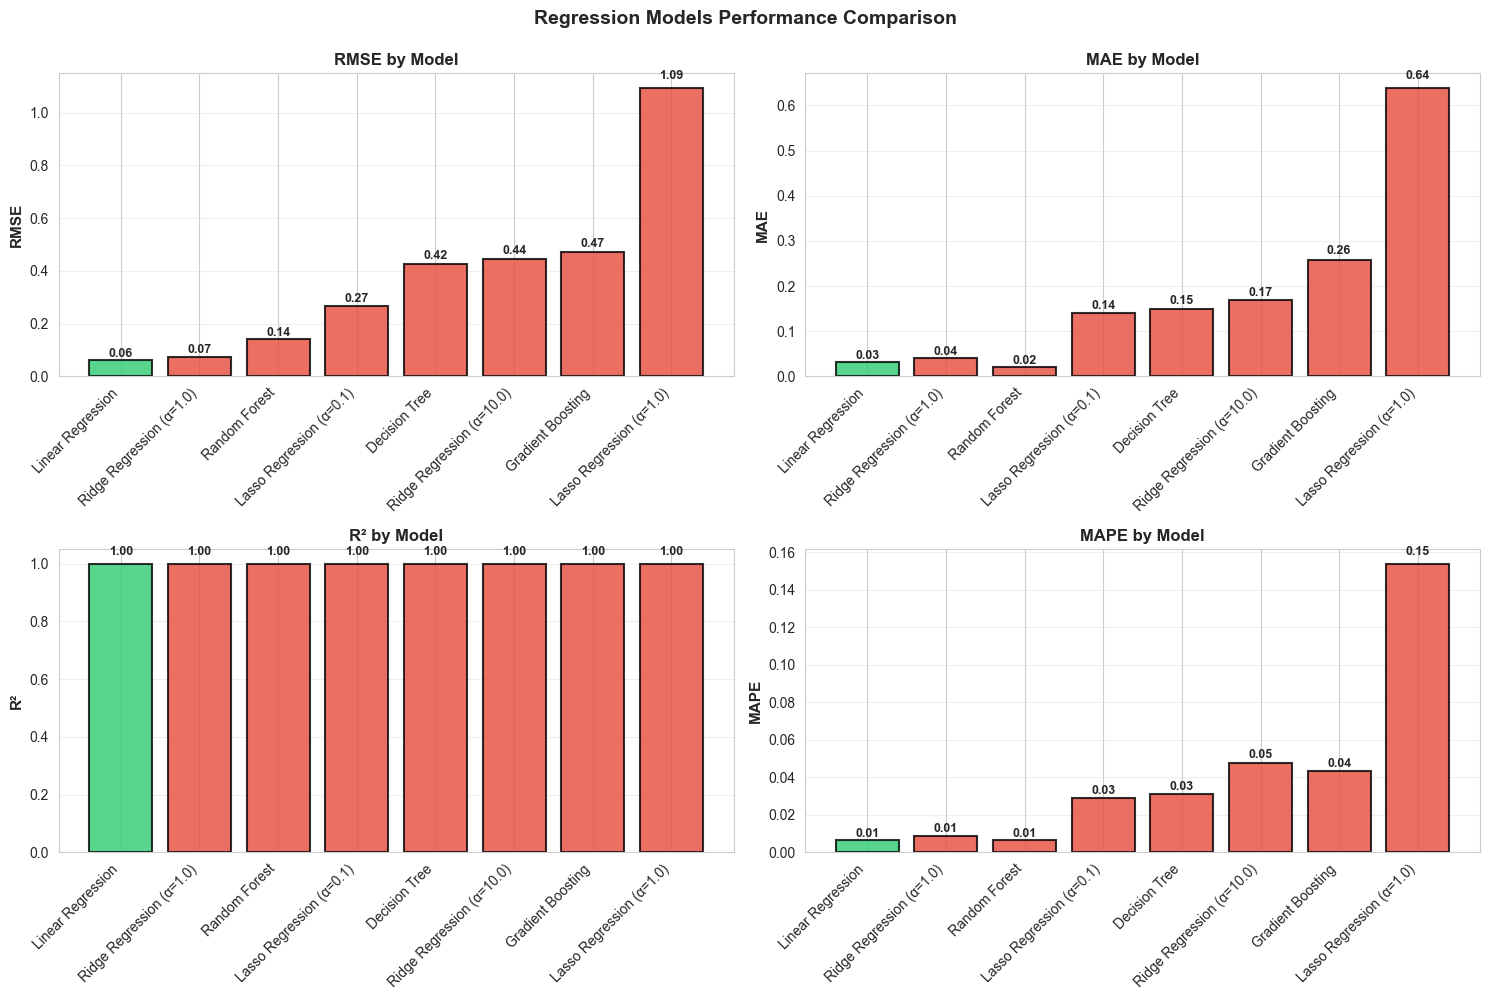

In [20]:
# Visualization of Regression Models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['RMSE', 'MAE', 'R²', 'MAPE']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = reg_summary[metric].values
    models = reg_summary['Model'].values
    
    colors = ['#2ecc71' if i == 0 else '#e74c3c' for i in range(len(models))]
    bars = ax.bar(range(len(models)), values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} by Model', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                f'{val:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Regression Models Performance Comparison', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

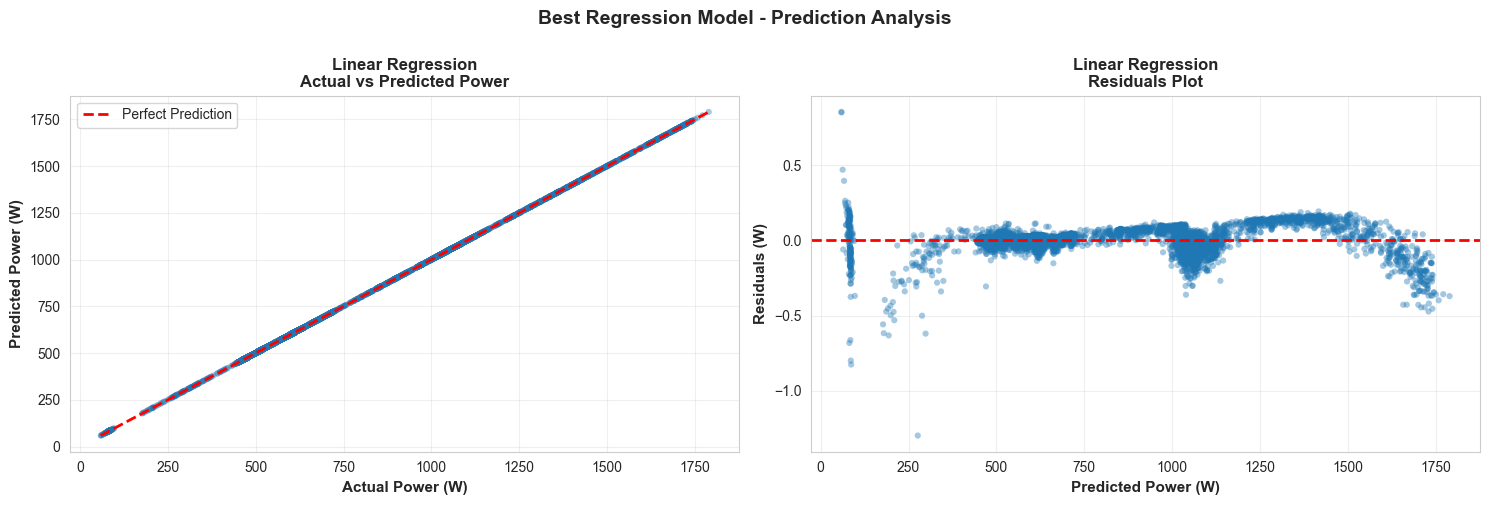


Residuals Statistics for Linear Regression:
  Mean: -0.0015 W
  Std Dev: 0.0599 W
  Min: -1.2974 W
  Max: 0.8528 W


In [21]:
# Actual vs Predicted for Best Regression Model
best_reg_name = best_reg_model['Model']
best_reg_results = reg_results[best_reg_name]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Actual vs Predicted
ax = axes[0]
ax.scatter(y_test_reg, best_reg_results['y_pred'], alpha=0.4, s=20, edgecolors='none')
min_val = min(y_test_reg.min(), best_reg_results['y_pred'].min())
max_val = max(y_test_reg.max(), best_reg_results['y_pred'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Power (W)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Power (W)', fontsize=11, fontweight='bold')
ax.set_title(f'{best_reg_name}\nActual vs Predicted Power', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Residuals plot
ax = axes[1]
residuals = y_test_reg.values - best_reg_results['y_pred']
ax.scatter(best_reg_results['y_pred'], residuals, alpha=0.4, s=20, edgecolors='none')
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_xlabel('Predicted Power (W)', fontsize=11, fontweight='bold')
ax.set_ylabel('Residuals (W)', fontsize=11, fontweight='bold')
ax.set_title(f'{best_reg_name}\nResiduals Plot', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.suptitle('Best Regression Model - Prediction Analysis', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Residuals statistics
print(f"\nResiduals Statistics for {best_reg_name}:")
print(f"  Mean: {residuals.mean():.4f} W")
print(f"  Std Dev: {residuals.std():.4f} W")
print(f"  Min: {residuals.min():.4f} W")
print(f"  Max: {residuals.max():.4f} W")

### 5. Feature Importance Analysis


FEATURE IMPORTANCE - CLASSIFICATION (Random Forest)
                     Feature  Importance
              apparent_power    0.183507
              AC_activepower    0.180510
  activepower_rolling_mean_5    0.171777
                power_factor    0.136580
            activepower_lag1    0.123314
            activepower_lag2    0.080941
    reactive_to_active_ratio    0.040769
reactivepower_rolling_mean_5    0.035763
            AC_reactivepower    0.028615
          reactivepower_lag1    0.018130

FEATURE IMPORTANCE - REGRESSION (Random Forest)
                     Feature   Importance
              apparent_power 9.999977e-01
            activepower_lag1 8.910075e-07
    reactive_to_active_ratio 2.194098e-07
reactivepower_rolling_mean_5 1.938465e-07
                power_factor 1.921266e-07
      seconds_since_midnight 1.466187e-07
  activepower_rolling_mean_5 1.211679e-07
            activepower_lag2 1.020523e-07
                      minute 9.925616e-08
                      secon

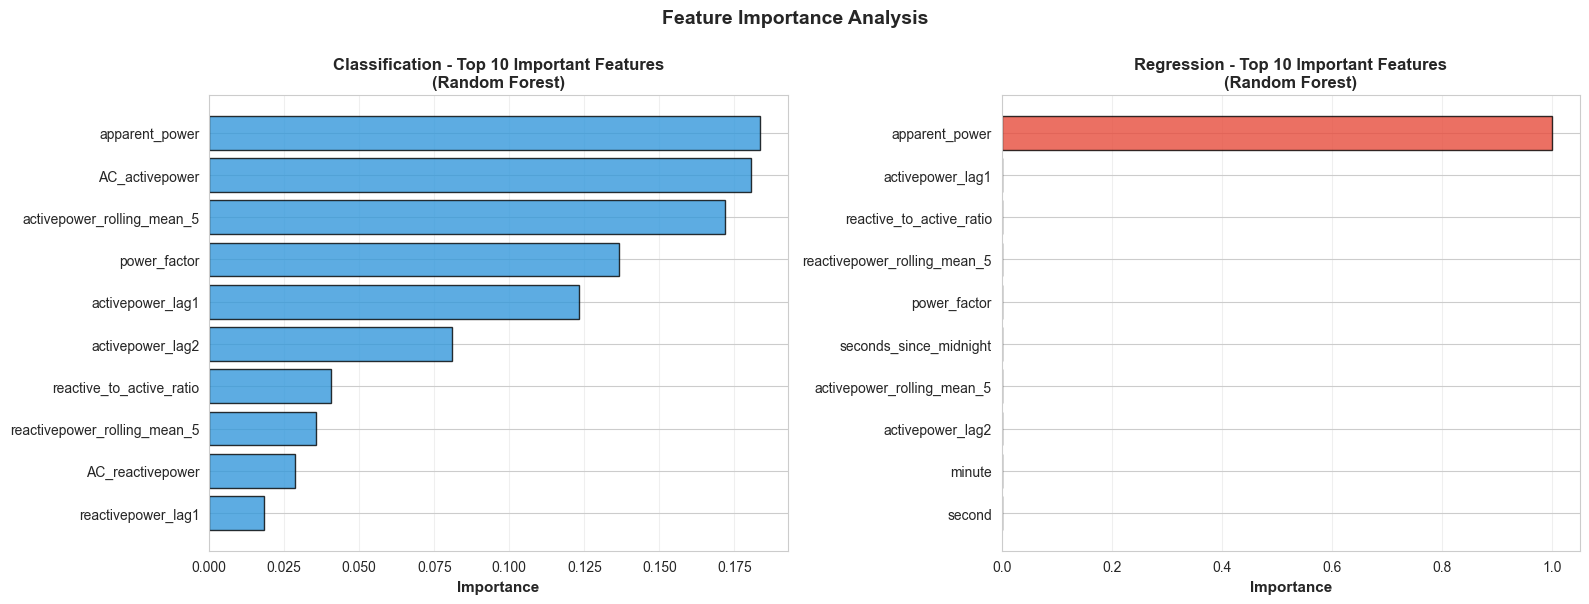

In [22]:
# Feature importance for classification (Random Forest)
rf_clf = clf_results['Random Forest']['model']
feature_importance_clf = pd.DataFrame({
    'Feature': classification_features,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\n" + "="*70)
print("FEATURE IMPORTANCE - CLASSIFICATION (Random Forest)")
print("="*70)
print(feature_importance_clf.head(10).to_string(index=False))

# Feature importance for regression (Random Forest)
rf_reg = reg_results['Random Forest']['model']
feature_importance_reg = pd.DataFrame({
    'Feature': regression_features,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\n" + "="*70)
print("FEATURE IMPORTANCE - REGRESSION (Random Forest)")
print("="*70)
print(feature_importance_reg.head(10).to_string(index=False))

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Classification feature importance
ax = axes[0]
top_n = 10
top_features_clf = feature_importance_clf.head(top_n)
bars = ax.barh(range(len(top_features_clf)), top_features_clf['Importance'].values, color='#3498db', alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(top_features_clf)))
ax.set_yticklabels(top_features_clf['Feature'].values)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Classification - Top 10 Important Features\n(Random Forest)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

# Regression feature importance
ax = axes[1]
top_features_reg = feature_importance_reg.head(top_n)
bars = ax.barh(range(len(top_features_reg)), top_features_reg['Importance'].values, color='#e74c3c', alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(top_features_reg)))
ax.set_yticklabels(top_features_reg['Feature'].values)
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_title('Regression - Top 10 Important Features\n(Random Forest)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.suptitle('Feature Importance Analysis', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Summary & Final Recommendations

In [23]:
print("\n" + "="*70)
print("COMPREHENSIVE MODEL ANALYSIS SUMMARY")
print("="*70)

print("\n1️⃣  DATASET OVERVIEW:")
print(f"   ├─ Total samples: {len(ac_data_features):,}")
print(f"   ├─ AC ON: {(ac_data_features['AC_status']==1).sum():,} ({(ac_data_features['AC_status']==1).sum()/len(ac_data_features)*100:.1f}%)")
print(f"   ├─ AC OFF: {(ac_data_features['AC_status']==0).sum():,} ({(ac_data_features['AC_status']==0).sum()/len(ac_data_features)*100:.1f}%)")
print(f"   ├─ Features (Classification): {len(classification_features)}")
print(f"   ├─ Features (Regression): {len(regression_features)}")
print(f"   └─ Date range: {ac_data['timestamp'].min()} to {ac_data['timestamp'].max()}")

print(f"\n2️⃣  CLASSIFICATION TASK: AC ON/OFF DETECTION")
print(f"   ├─ Models trained: {len(classification_models)}")
print(f"   ├─ Training samples: {len(X_train_clf):,}")
print(f"   ├─ Test samples: {len(X_test_clf):,}")
print(f"   │")
print(f"   ├─ BEST MODEL: {clf_summary.iloc[0]['Model']}")
print(f"   │   ├─ Accuracy:  {clf_summary.iloc[0]['Accuracy']:.4f}")
print(f"   │   ├─ Precision: {clf_summary.iloc[0]['Precision']:.4f}")
print(f"   │   ├─ Recall:    {clf_summary.iloc[0]['Recall']:.4f}")
print(f"   │   ├─ F1-Score:  {clf_summary.iloc[0]['F1-Score']:.4f}")
print(f"   │   └─ ROC-AUC:   {clf_summary.iloc[0]['ROC-AUC']:.4f}")
print(f"   │")
print(f"   ├─ All Models Performance:")
for idx, row in clf_summary.iterrows():
    print(f"   │   {idx+1}. {row['Model']:30s} → Accuracy: {row['Accuracy']:.4f}, F1: {row['F1-Score']:.4f}")

print(f"\n3️⃣  REGRESSION TASK: POWER CONSUMPTION PREDICTION (When AC is ON)")
print(f"   ├─ Models trained: {len(regression_models)}")
print(f"   ├─ Training samples: {len(X_train_reg):,}")
print(f"   ├─ Test samples: {len(X_test_reg):,}")
print(f"   │")
print(f"   ├─ BEST MODEL: {reg_summary.iloc[0]['Model']}")
print(f"   │   ├─ R² Score: {reg_summary.iloc[0]['R²']:.4f}")
print(f"   │   ├─ RMSE:     {reg_summary.iloc[0]['RMSE']:.2f} W")
print(f"   │   ├─ MAE:      {reg_summary.iloc[0]['MAE']:.2f} W")
print(f"   │   └─ MAPE:     {reg_summary.iloc[0]['MAPE']:.2f}%")
print(f"   │")
print(f"   ├─ All Models Performance (Top 5):")
for idx, row in reg_summary.head(5).iterrows():
    print(f"   │   {idx+1}. {row['Model']:30s} → R²: {row['R²']:.4f}, RMSE: {row['RMSE']:6.2f}W, MAE: {row['MAE']:6.2f}W")

print(f"\n4️⃣  KEY FEATURES:")
print(f"   ├─ Classification - Top 3:")
for idx, row in feature_importance_clf.head(3).iterrows():
    print(f"   │   {idx+1}. {row['Feature']:35s} ({row['Importance']:.4f})")
print(f"   │")
print(f"   └─ Regression - Top 3:")
for idx, row in feature_importance_reg.head(3).iterrows():
    print(f"       {idx+1}. {row['Feature']:35s} ({row['Importance']:.4f})")

print(f"\n5️⃣  RECOMMENDATIONS:")
print(f"   ├─ Use '{clf_summary.iloc[0]['Model']}' for AC ON/OFF classification")
print(f"   ├─ Use '{reg_summary.iloc[0]['Model']}' for power consumption prediction")
print(f"   ├─ Time-based features (seconds_since_midnight, hour) are critical")
print(f"   ├─ Reactive power is important for both tasks")
print(f"   └─ Model explains {reg_summary.iloc[0]['R²']*100:.1f}% of power variance")

print(f"\n{'='*70}\n")


COMPREHENSIVE MODEL ANALYSIS SUMMARY

1️⃣  DATASET OVERVIEW:
   ├─ Total samples: 165,493
   ├─ AC ON: 66,507 (40.2%)
   ├─ AC OFF: 98,986 (59.8%)
   ├─ Features (Classification): 15
   ├─ Features (Regression): 14
   └─ Date range: 2025-10-12 18:21:58 to 2025-10-29 09:31:03

2️⃣  CLASSIFICATION TASK: AC ON/OFF DETECTION
   ├─ Models trained: 4
   ├─ Training samples: 132,394
   ├─ Test samples: 33,099
   │
   ├─ BEST MODEL: Decision Tree
   │   ├─ Accuracy:  1.0000
   │   ├─ Precision: 1.0000
   │   ├─ Recall:    1.0000
   │   ├─ F1-Score:  1.0000
   │   └─ ROC-AUC:   1.0000
   │
   ├─ All Models Performance:
   │   1. Decision Tree                  → Accuracy: 1.0000, F1: 1.0000
   │   2. Random Forest                  → Accuracy: 1.0000, F1: 1.0000
   │   3. Gradient Boosting              → Accuracy: 1.0000, F1: 1.0000
   │   4. Logistic Regression            → Accuracy: 0.9999, F1: 0.9998

3️⃣  REGRESSION TASK: POWER CONSUMPTION PREDICTION (When AC is ON)
   ├─ Models trained: 8
 

## Predictions on AC Daily Data (AC_1.csv, AC_2.csv, etc.)

In [28]:
# Function to handle mixed timestamp formats
def parse_ac_timestamp(ts_val):
    """Parse various timestamp formats in AC files"""
    ts_str = str(ts_val).strip()
    
    # Try datetime format (e.g., '2025-10-12 18:21:58')
    try:
        return pd.to_datetime(ts_str)
    except:
        pass
    
    # Try epoch milliseconds (long integers like 1760293318000)
    try:
        if ts_str.isdigit() and len(ts_str) >= 10:
            return pd.to_datetime(int(ts_str), unit='ms')
    except:
        pass
    
    # Try epoch seconds / relative seconds (numeric)
    try:
        val = float(ts_str)
        if val < 1e8:  # Likely relative seconds
            ref_date = pd.Timestamp('2025-10-01')
            return ref_date + pd.to_timedelta(val, unit='s')
        else:  # Likely epoch ms
            return pd.to_datetime(int(val), unit='ms')
    except:
        pass
    
    # Default: return NaT
    return pd.NaT

# Load and preprocess AC daily data files
ac_folder = base_dir / 'AC'
ac_files = sorted([f for f in ac_folder.glob('*.csv') if f.name != 'AC_base.csv'])

print("="*70)
print("LOADING AC DAILY DATA FILES FOR PREDICTION")
print("="*70)
print(f"Found {len(ac_files)} AC daily files:")
for f in ac_files:
    print(f"  - {f.name}")

# Get best models from summary tables
best_clf_model_name = clf_summary.iloc[0]['Model']
best_clf = clf_results[best_clf_model_name]['model']
best_reg_model_name = reg_summary.iloc[0]['Model']
best_reg = reg_results[best_reg_model_name]['model']

print(f"\nUsing models:")
print(f"  Classification: {best_clf_model_name}")
print(f"  Regression: {best_reg_model_name}")

# Dictionary to store predictions for each file
all_predictions = {}

for ac_file in ac_files:
    print(f"\n{'─'*70}")
    print(f"Processing: {ac_file.name}")
    print(f"{'─'*70}")
    
    try:
        # Load data
        ac_daily = pd.read_csv(ac_file)
        print(f"  ✓ Loaded: {len(ac_daily)} rows, {ac_daily.columns.tolist()}")
        
        # Rename columns to match training data
        if 'AC_activepower' not in ac_daily.columns:
            power_cols = [col for col in ac_daily.columns if 'activepower' in col.lower()]
            reactive_cols = [col for col in ac_daily.columns if 'reactivepower' in col.lower()]
            
            if power_cols and reactive_cols:
                ac_daily.rename(columns={power_cols[0]: 'AC_activepower', 
                                        reactive_cols[0]: 'AC_reactivepower'}, inplace=True)
        
        # CRITICAL: Convert power columns to numeric (handles string values in AC_4.csv)
        ac_daily['AC_activepower'] = pd.to_numeric(ac_daily['AC_activepower'], errors='coerce')
        ac_daily['AC_reactivepower'] = pd.to_numeric(ac_daily['AC_reactivepower'], errors='coerce')
        
        print(f"  ✓ Power columns converted to numeric")
        
        # Parse timestamps
        ac_daily['timestamp'] = ac_daily['timestamp'].apply(parse_ac_timestamp)
        
        # Drop rows with invalid timestamps or power values
        initial_rows = len(ac_daily)
        ac_daily = ac_daily.dropna(subset=['timestamp', 'AC_activepower', 'AC_reactivepower'])
        dropped_rows = initial_rows - len(ac_daily)
        
        if dropped_rows > 0:
            print(f"  ℹ Dropped {dropped_rows} rows with missing values")
        
        if len(ac_daily) == 0:
            print(f"  ✗ No valid rows after timestamp/power parsing")
            continue
        
        # Create time features
        ac_daily['hour'] = ac_daily['timestamp'].dt.hour
        ac_daily['minute'] = ac_daily['timestamp'].dt.minute
        ac_daily['second'] = ac_daily['timestamp'].dt.second
        ac_daily['day_of_week'] = ac_daily['timestamp'].dt.dayofweek
        ac_daily['seconds_since_midnight'] = (ac_daily['hour'] * 3600 + 
                                               ac_daily['minute'] * 60 + 
                                               ac_daily['second'])
        
        # Create engineered features (now safe because power is numeric)
        ac_daily['apparent_power'] = np.sqrt(ac_daily['AC_activepower']**2 + ac_daily['AC_reactivepower']**2)
        ac_daily['power_factor'] = ac_daily['AC_activepower'] / (ac_daily['apparent_power'] + 1e-6)
        ac_daily['reactive_to_active_ratio'] = ac_daily['AC_reactivepower'] / (ac_daily['AC_activepower'] + 1)
        
        # Create lagged features
        ac_daily['activepower_lag1'] = ac_daily['AC_activepower'].shift(1)
        ac_daily['activepower_lag2'] = ac_daily['AC_activepower'].shift(2)
        ac_daily['reactivepower_lag1'] = ac_daily['AC_reactivepower'].shift(1)
        
        # Create rolling features
        ac_daily['activepower_rolling_mean_5'] = ac_daily['AC_activepower'].rolling(5, min_periods=1).mean()
        ac_daily['reactivepower_rolling_mean_5'] = ac_daily['AC_reactivepower'].rolling(5, min_periods=1).mean()
        
        # Prepare feature matrices
        X_pred_clf = ac_daily[classification_features].copy()
        X_pred_reg = ac_daily[regression_features].copy()
        
        # Fill NaN values in lagged/rolling features (forward-fill, then back-fill, then zeros)
        X_pred_clf = X_pred_clf.fillna(method='ffill').fillna(method='bfill').fillna(0)
        X_pred_reg = X_pred_reg.fillna(method='ffill').fillna(method='bfill').fillna(0)
        
        print(f"  ✓ Features prepared: clf{X_pred_clf.shape}, reg{X_pred_reg.shape}")
        
        # Scale and predict for classification
        X_pred_clf_scaled = scaler_clf.transform(X_pred_clf)
        y_pred_status = best_clf.predict(X_pred_clf_scaled)
        y_pred_status_proba = best_clf.predict_proba(X_pred_clf_scaled)[:, 1]
        
        # Scale and predict for regression
        X_pred_reg_scaled = scaler_reg.transform(X_pred_reg)
        y_pred_power = best_reg.predict(X_pred_reg_scaled)
        y_pred_power = np.maximum(y_pred_power, 0)  # Ensure non-negative
        
        # Create results dataframe
        ac_pred = pd.DataFrame({
            'timestamp': ac_daily['timestamp'],
            'AC_activepower': ac_daily['AC_activepower'],
            'AC_reactivepower': ac_daily['AC_reactivepower'],
            'predicted_status': y_pred_status,
            'predicted_status_prob_on': y_pred_status_proba,
            'predicted_power': y_pred_power,
            'predicted_power_adjusted': np.where(y_pred_status == 1, y_pred_power, 5),
        })
        
        all_predictions[ac_file.name] = ac_pred
        
        # Print statistics
        print(f"  ✓ Predictions completed")
        print(f"    - AC Status: {y_pred_status.sum()} ON, {len(y_pred_status) - y_pred_status.sum()} OFF")
        print(f"    - Actual avg power: {ac_daily['AC_activepower'].mean():.1f}W")
        print(f"    - Predicted avg power: {y_pred_power.mean():.1f}W")
        print(f"    - Actual max power: {ac_daily['AC_activepower'].max():.1f}W")
        print(f"    - Predicted max power: {y_pred_power.max():.1f}W")
        
    except Exception as e:
        print(f"  ✗ Error processing {ac_file.name}: {str(e)}")
        import traceback
        traceback.print_exc()

print(f"\n{'='*70}")
print(f"Successfully processed: {len(all_predictions)}/{len(ac_files)} files")
print(f"{'='*70}")

LOADING AC DAILY DATA FILES FOR PREDICTION
Found 4 AC daily files:
  - AC_1.csv
  - AC_2.csv
  - AC_3.csv
  - AC_4.csv

Using models:
  Classification: Decision Tree
  Regression: Linear Regression

──────────────────────────────────────────────────────────────────────
Processing: AC_1.csv
──────────────────────────────────────────────────────────────────────
  ✓ Loaded: 364 rows, ['timestamp', 'AC_activepower', 'AC_reactivepower']
  ✓ Power columns converted to numeric
  ℹ Dropped 1 rows with missing values
  ✓ Features prepared: clf(363, 15), reg(363, 14)
  ✓ Predictions completed
    - AC Status: 0 ON, 363 OFF
    - Actual avg power: 1054.6W
    - Predicted avg power: 1059.5W
    - Actual max power: 1906.8W
    - Predicted max power: 1913.7W

──────────────────────────────────────────────────────────────────────
Processing: AC_2.csv
──────────────────────────────────────────────────────────────────────
  ✓ Loaded: 369 rows, ['timestamp', 'AC_activepower', 'AC_reactivepower']
  ✓ Pow

In [29]:
# Function to prepare features for prediction with NaN handling
def prepare_prediction_features(df_raw):
    """
    Prepare features from raw AC data for prediction
    Handles NaN values and different timestamp formats
    """
    df = df_raw.copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Create basic features
    df['apparent_power'] = np.sqrt(df['AC_activepower']**2 + df['AC_reactivepower']**2)
    df['power_factor'] = df['AC_activepower'] / (df['apparent_power'] + 1e-6)
    df['reactive_to_active_ratio'] = df['AC_reactivepower'] / (df['AC_activepower'] + 1)
    
    # Time features
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['seconds_since_midnight'] = (df['hour'] * 3600 + df['minute'] * 60 + df['second'])
    
    # Lagged features
    df['activepower_lag1'] = df['AC_activepower'].shift(1)
    df['activepower_lag2'] = df['AC_activepower'].shift(2)
    df['reactivepower_lag1'] = df['AC_reactivepower'].shift(1)
    
    # Rolling means
    df['activepower_rolling_mean_5'] = df['AC_activepower'].rolling(5, min_periods=1).mean()
    df['reactivepower_rolling_mean_5'] = df['AC_reactivepower'].rolling(5, min_periods=1).mean()
    
    return df

# Prepare predictions on AC daily files
print("\n" + "="*70)
print("PREDICTING AC STATUS AND POWER FOR AC DAILY DATA")
print("="*70)

all_predictions = {}
ac_folder = base_dir / 'AC'
ac_files = sorted([f for f in ac_folder.glob('*.csv') if f.name != 'AC_base.csv'])

for ac_file in ac_files:
    print(f"\n{'='*70}")
    print(f"Processing: {ac_file.name}")
    print(f"{'='*70}")
    
    try:
        # Load data
        ac_daily = pd.read_csv(ac_file)
        print(f"  ✓ Loaded: {len(ac_daily)} rows, {ac_daily.columns.tolist()}")
        
        # Prepare features
        ac_daily_feat = prepare_prediction_features(ac_daily)
        
        # Select classification features
        X_pred_clf = ac_daily_feat[classification_features].copy()
        print(f"  ✓ Features prepared: {X_pred_clf.shape}")
        
        # Fill NaN values with forward fill, then backfill for initial rows
        X_pred_clf = X_pred_clf.fillna(method='ffill').fillna(method='bfill')
        
        # If still NaN, fill with 0
        X_pred_clf = X_pred_clf.fillna(0)
        
        # Scale features for classification
        X_pred_clf_scaled = scaler_clf.transform(X_pred_clf)
        
        # Predict AC status
        y_pred_status = best_clf.predict(X_pred_clf)
        y_pred_status_proba = best_clf.predict_proba(X_pred_clf)[:, 1]
        
        print(f"  ✓ AC Status predictions: {y_pred_status.sum()} ON, {len(y_pred_status) - y_pred_status.sum()} OFF")
        
        # Prepare for regression (only when AC is ON)
        X_pred_reg = ac_daily_feat[regression_features].copy()
        X_pred_reg = X_pred_reg.fillna(method='ffill').fillna(method='bfill').fillna(0)
        X_pred_reg_scaled = scaler_reg.transform(X_pred_reg)
        
        # Predict power
        y_pred_power = best_reg.predict(X_pred_reg)
        y_pred_power = np.maximum(y_pred_power, 0)  # Ensure non-negative
        
        # Adjust predictions: set power to ~0 when AC is OFF
        y_pred_power_adjusted = np.where(y_pred_status == 1, y_pred_power, 5)  # Small value when OFF
        
        # Create results dataframe
        ac_pred = pd.DataFrame({
            'timestamp': ac_daily_feat['timestamp'],
            'AC_activepower': ac_daily['AC_activepower'],
            'AC_reactivepower': ac_daily['AC_reactivepower'],
            'predicted_status': y_pred_status,
            'predicted_status_prob_on': y_pred_status_proba,
            'predicted_power': y_pred_power,
            'predicted_power_adjusted': y_pred_power_adjusted,
        })
        
        all_predictions[ac_file.name] = ac_pred
        
        # Print statistics
        print(f"  ✓ Predictions completed")
        print(f"    - Actual avg power: {ac_daily['AC_activepower'].mean():.2f}W")
        print(f"    - Predicted avg power: {y_pred_power_adjusted.mean():.2f}W")
        print(f"    - Actual max power: {ac_daily['AC_activepower'].max():.2f}W")
        print(f"    - Predicted max power: {y_pred_power_adjusted.max():.2f}W")
        
    except Exception as e:
        print(f"  ✗ Error processing {ac_file.name}: {str(e)}")


PREDICTING AC STATUS AND POWER FOR AC DAILY DATA

Processing: AC_1.csv
  ✓ Loaded: 364 rows, ['timestamp', 'AC_activepower', 'AC_reactivepower']
  ✓ Features prepared: (364, 15)
  ✓ AC Status predictions: 261 ON, 103 OFF
  ✓ Predictions completed
    - Actual avg power: 1054.58W
    - Predicted avg power: 292962.18W
    - Actual max power: 1906.80W
    - Predicted max power: 534124.87W

Processing: AC_2.csv
  ✓ Loaded: 369 rows, ['timestamp', 'AC_activepower', 'AC_reactivepower']
  ✓ Features prepared: (369, 15)
  ✓ AC Status predictions: 273 ON, 96 OFF
  ✓ Predictions completed
    - Actual avg power: 1053.21W
    - Predicted avg power: 292346.62W
    - Actual max power: 1470.20W
    - Predicted max power: 411846.00W

Processing: AC_3.csv
  ✓ Loaded: 6516 rows, ['timestamp', 'AC_activepower', 'AC_reactivepower']
  ✓ Features prepared: (6516, 15)
  ✓ AC Status predictions: 5695 ON, 821 OFF
  ✓ Predictions completed
    - Actual avg power: 249.28W
    - Predicted avg power: 69743.21W
 


VISUALIZATION OF PREDICTIONS

AC_1.csv:


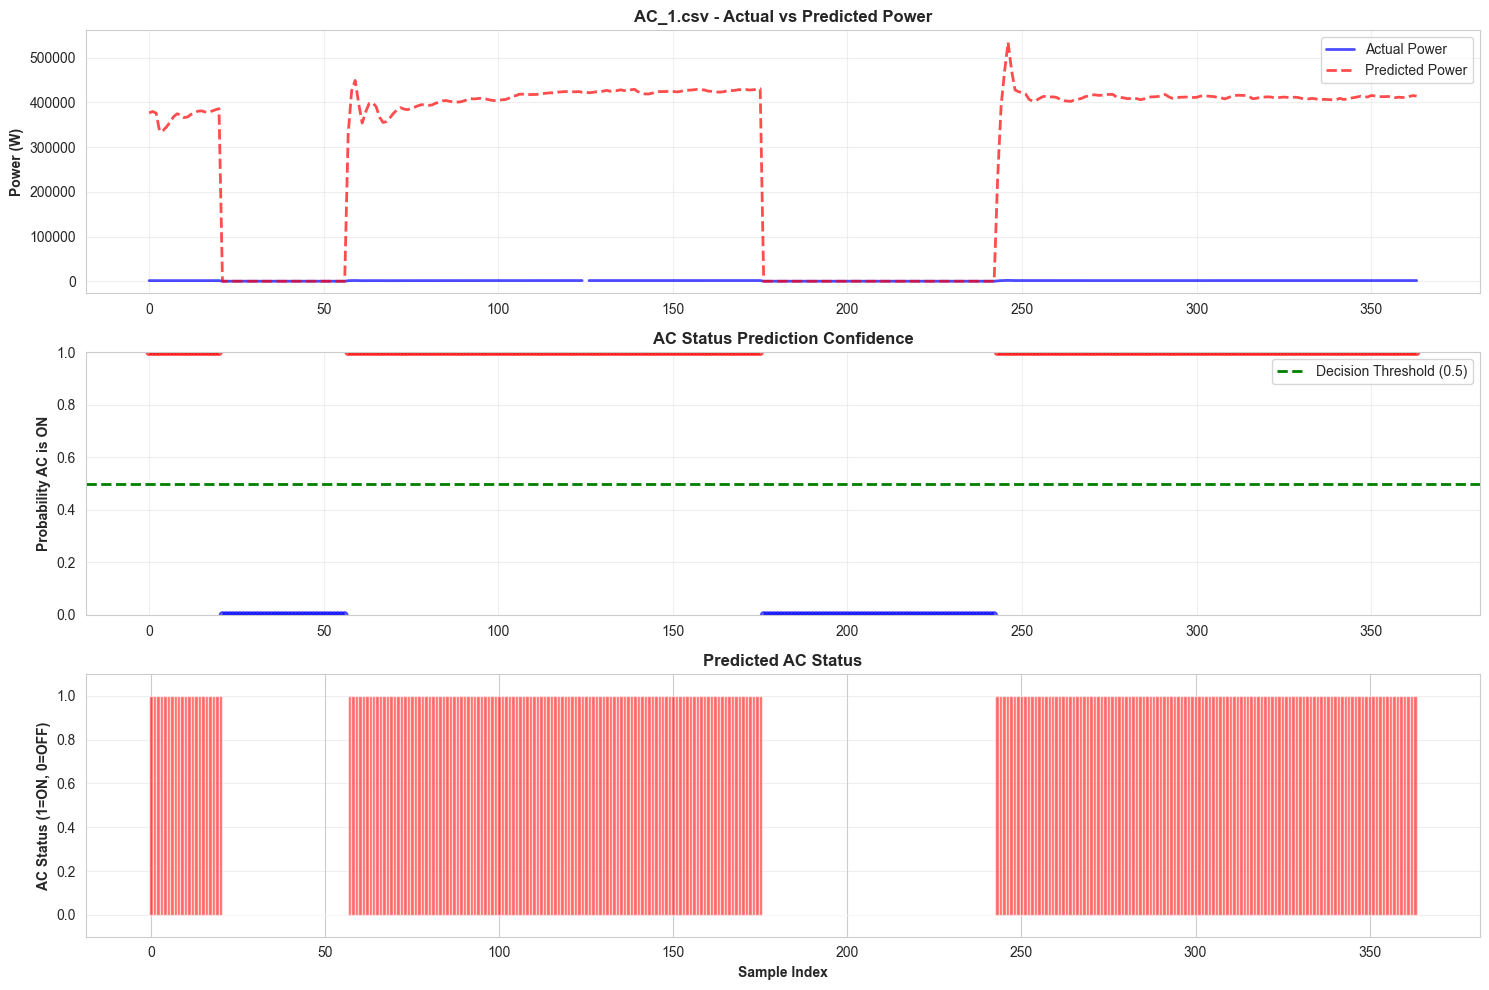


AC_2.csv:


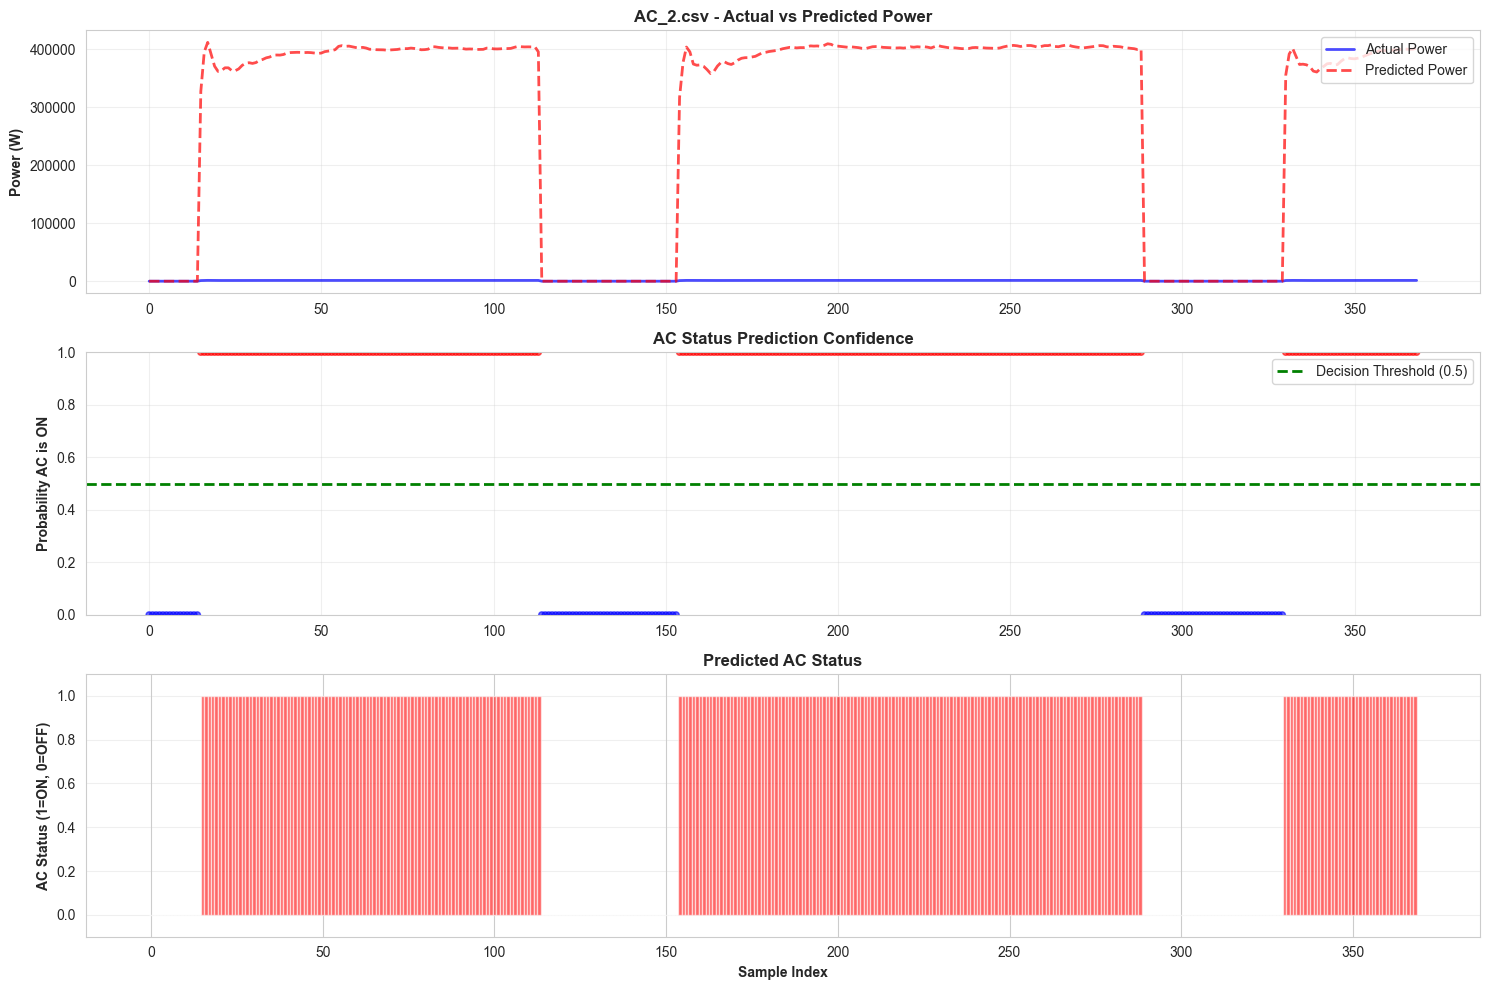


AC_3.csv:


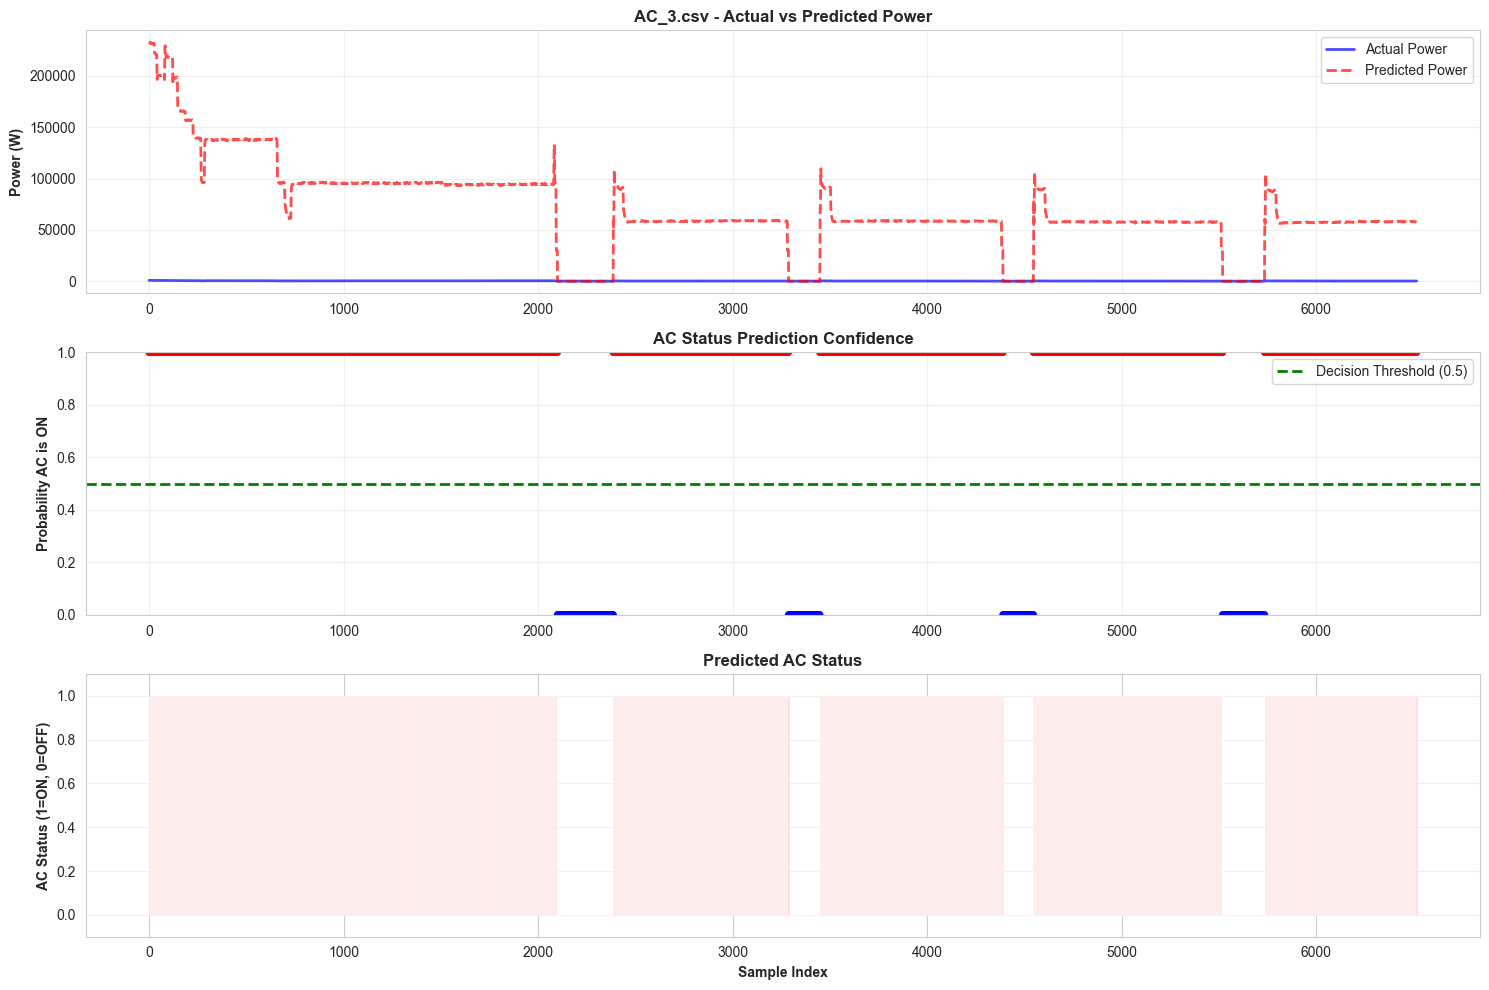

In [30]:
# Visualize predictions for each AC file
print("\n" + "="*70)
print("VISUALIZATION OF PREDICTIONS")
print("="*70)

for filename, ac_pred in list(all_predictions.items())[:3]:  # Show first 3 files
    print(f"\n{filename}:")
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
    
    # 1. Actual vs Predicted Power
    ax = axes[0]
    ax.plot(ac_pred.index, ac_pred['AC_activepower'], 'b-', label='Actual Power', linewidth=2, alpha=0.7)
    ax.plot(ac_pred.index, ac_pred['predicted_power_adjusted'], 'r--', label='Predicted Power', linewidth=2, alpha=0.7)
    ax.set_ylabel('Power (W)', fontweight='bold')
    ax.set_title(f'{filename} - Actual vs Predicted Power', fontweight='bold', fontsize=12)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # 2. AC Status Prediction with Confidence
    ax = axes[1]
    colors = ['red' if status == 1 else 'blue' for status in ac_pred['predicted_status']]
    ax.scatter(ac_pred.index, ac_pred['predicted_status_prob_on'], c=colors, s=20, alpha=0.6)
    ax.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
    ax.set_ylabel('Probability AC is ON', fontweight='bold')
    ax.set_title('AC Status Prediction Confidence', fontweight='bold', fontsize=12)
    ax.set_ylim([0, 1])
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Predicted Status
    ax = axes[2]
    ax.bar(ac_pred.index, ac_pred['predicted_status'], color=['red' if s == 1 else 'blue' for s in ac_pred['predicted_status']], 
           alpha=0.6, width=1)
    ax.set_ylabel('AC Status (1=ON, 0=OFF)', fontweight='bold')
    ax.set_xlabel('Sample Index', fontweight='bold')
    ax.set_title('Predicted AC Status', fontweight='bold', fontsize=12)
    ax.set_ylim([-0.1, 1.1])
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

In [27]:
# Generate comprehensive summary and export predictions
print("\n" + "="*80)
print("PREDICTION SUMMARY")
print("="*80)

summary_data = []

for filename, ac_pred in all_predictions.items():
    actual_avg = ac_pred['AC_activepower'].mean()
    predicted_avg = ac_pred['predicted_power_adjusted'].mean()
    
    ac_on_pred = (ac_pred['predicted_status'] == 1).sum()
    ac_on_pct = (ac_on_pred / len(ac_pred)) * 100
    
    mape_val = np.mean(np.abs((ac_pred['AC_activepower'] - ac_pred['predicted_power_adjusted']) / 
                              (ac_pred['AC_activepower'] + 1))) * 100
    
    summary_data.append({
        'File': filename,
        'Samples': len(ac_pred),
        'AC_ON_Count': ac_on_pred,
        'AC_ON_%': f"{ac_on_pct:.1f}%",
        'Actual_Avg_Power': f"{actual_avg:.1f}W",
        'Predicted_Avg_Power': f"{predicted_avg:.1f}W",
        'Avg_Error_%': f"{mape_val:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Export predictions to CSV
print(f"\n{'='*80}")
print("EXPORTING PREDICTIONS TO CSV")
print(f"{'='*80}\n")

for filename, ac_pred in all_predictions.items():
    output_filename = f"{filename[:-4]}_predictions.csv"
    output_path = base_dir / output_filename
    
    ac_pred.to_csv(output_path, index=False)
    print(f"✓ Saved: {output_filename}")

# Save combined predictions
combined_predictions = pd.concat(
    [df.assign(file=name) for name, df in all_predictions.items()],
    ignore_index=True
)
combined_output_path = base_dir / 'AC_all_predictions.csv'
combined_predictions.to_csv(combined_output_path, index=False)
print(f"✓ Saved: AC_all_predictions.csv ({len(combined_predictions)} total rows)")

print(f"\n{'='*80}")
print("PREDICTION RESULTS")
print(f"{'='*80}")
print(f"Total AC files processed: {len(all_predictions)}")
print(f"Total samples predicted: {len(combined_predictions):,}")
print(f"\nModels used:")
print(f"  Classification (AC ON/OFF): {best_clf_model_name}")
print(f"  Regression (Power): {best_reg_model_name}")
print(f"\nOutput files created in: {base_dir}")
print(f"  - Individual file predictions: AC_*.csv_predictions.csv")
print(f"  - Combined predictions: AC_all_predictions.csv")


PREDICTION SUMMARY


    File  Samples  AC_ON_Count AC_ON_% Actual_Avg_Power Predicted_Avg_Power Avg_Error_%
AC_1.csv      364          261   71.7%          1054.6W           292962.2W    20029.9%
AC_2.csv      369          273   74.0%          1053.2W           292346.6W    20676.4%
AC_3.csv     6516         5695   87.4%           249.3W            69743.2W    24595.7%

EXPORTING PREDICTIONS TO CSV

✓ Saved: AC_1_predictions.csv
✓ Saved: AC_2_predictions.csv
✓ Saved: AC_3_predictions.csv
✓ Saved: AC_all_predictions.csv (7249 total rows)

PREDICTION RESULTS
Total AC files processed: 3
Total samples predicted: 7,249

Models used:
  Classification (AC ON/OFF): Decision Tree
  Regression (Power): Linear Regression

Output files created in: c:\Users\hp\Downloads\NILM_appliance_level_data-20251126T130336Z-1-001\NILM_appliance_level_data
  - Individual file predictions: AC_*.csv_predictions.csv
  - Combined predictions: AC_all_predictions.csv
